# <u>**Unsupervised Learning**</u>

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

### Dataset Links
https://allisonhorst.github.io/palmerpenguins/

https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data (Use the 'penguins_size.csv' file)


In [2]:
# Importing the dataset
data = pd.read_csv('C:\\Users\\20246\\Desktop\\ML Coursework\\penguins_size.csv')
data.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [3]:
# Making a copy of the dataset
df = data.copy()

# Exploratory Data Analysis

In [4]:
# Understanding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
# Distribution of the numerical columns
df.describe().T

count         mean         std     min       25%      50%  \
culmen_length_mm   342.0    43.921930    5.459584    32.1    39.225    44.45   
culmen_depth_mm    342.0    17.151170    1.974793    13.1    15.600    17.30   
flipper_length_mm  342.0   200.915205   14.061714   172.0   190.000   197.00   
body_mass_g        342.0  4201.754386  801.954536  2700.0  3550.000  4050.00   

                      75%     max  
culmen_length_mm     48.5    59.6  
culmen_depth_mm      18.7    21.5  
flipper_length_mm   213.0   231.0  
body_mass_g        4750.0  6300.0

In [6]:
# Obtaining the list of categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
cat_cols

['species', 'island', 'sex']

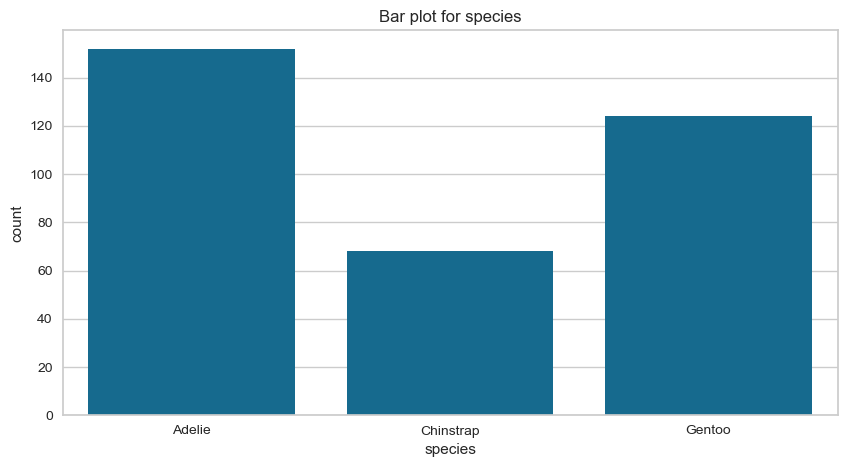

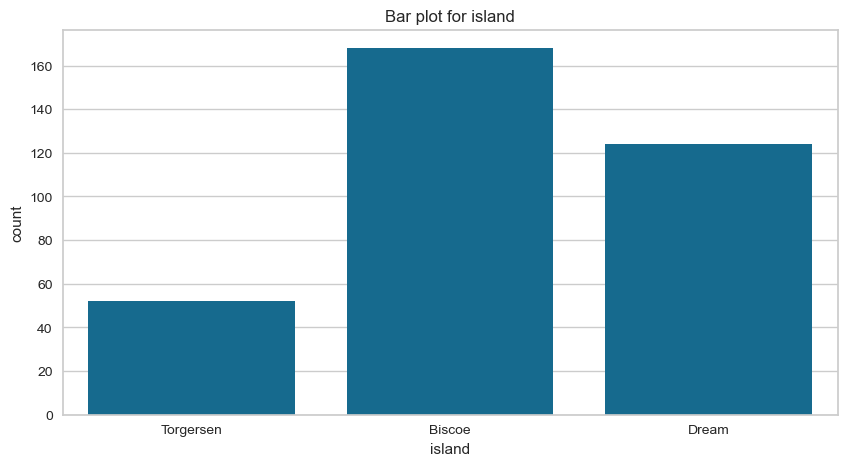

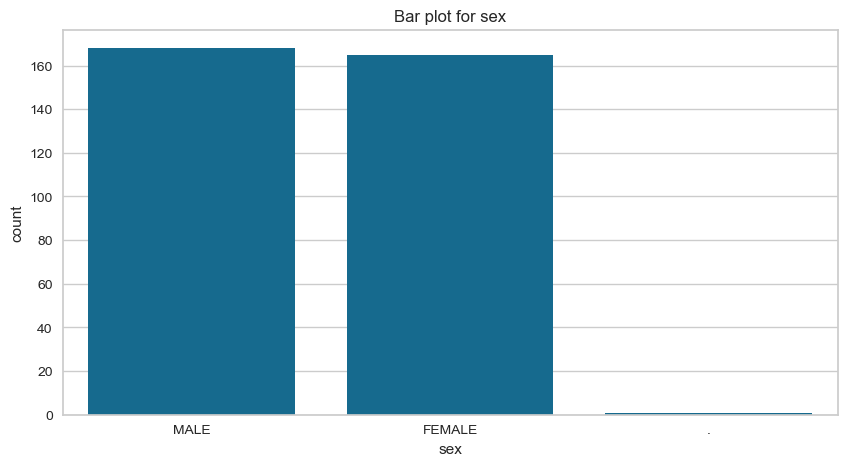

In [7]:
# Create bar plots for each categorical column
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df, legend=False)
    plt.title(f'Bar plot for {col}')
    plt.show()

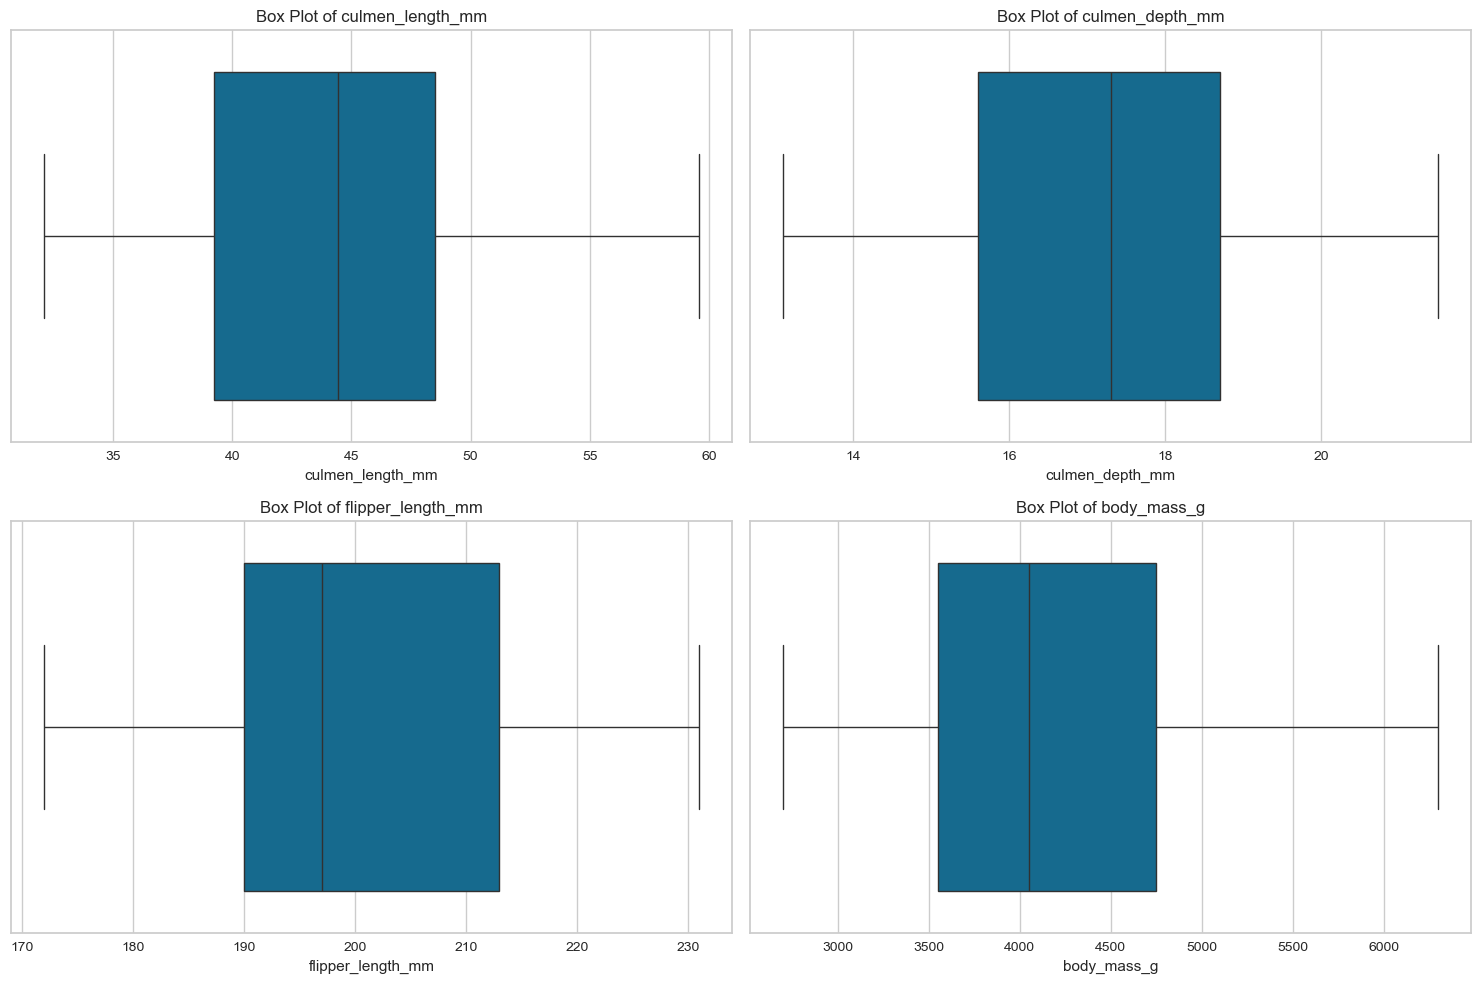

In [8]:
# Obtaining the list of numerical columns
num_cols = df.select_dtypes(include=['number']).columns.tolist()
num_cols

# Creating subplots
n_cols = 2
n_rows = -(-len(num_cols) // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, column in enumerate(num_cols):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_xlabel(column)

for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

<Figure size 800x550 with 0 Axes>

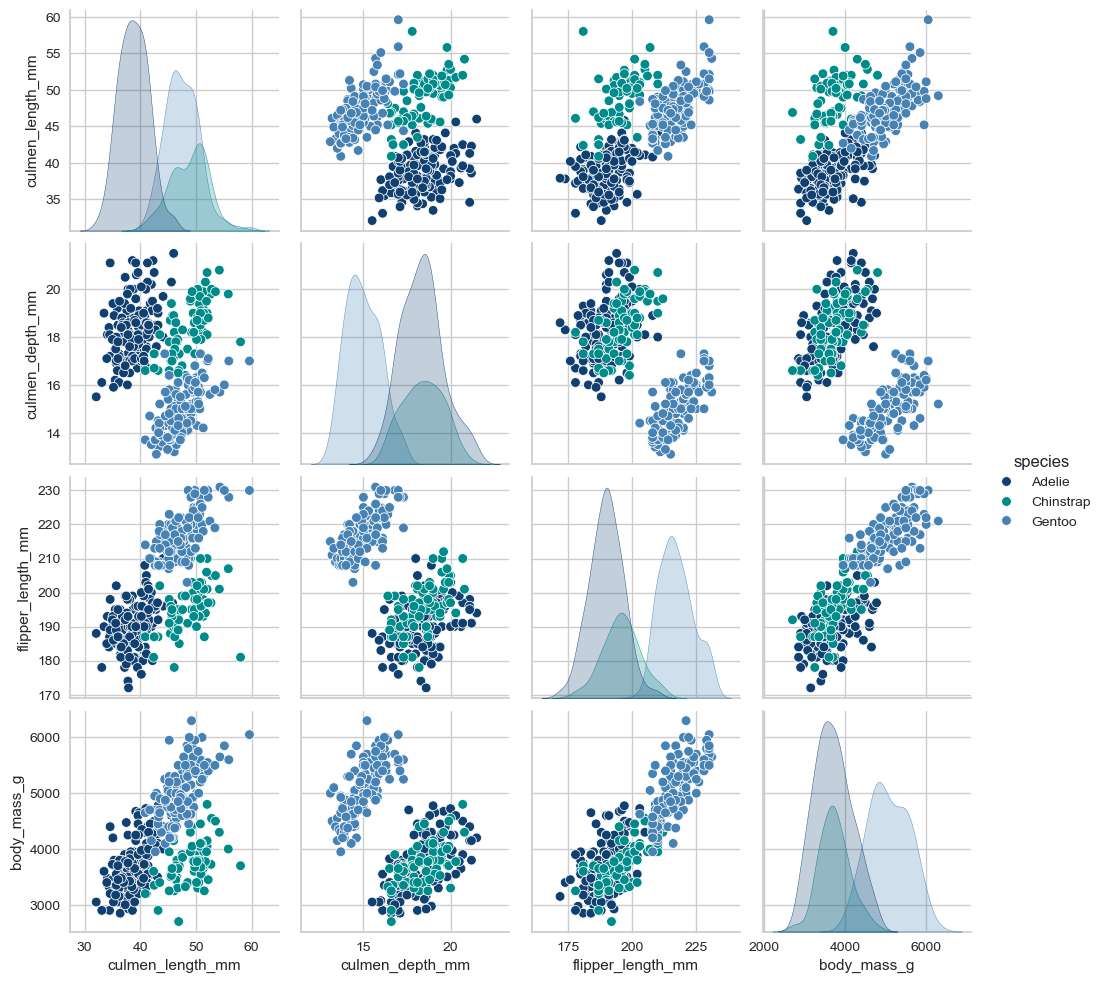

In [9]:
# Scatterplot
plt.figure()
sns.pairplot(df, hue='species', palette=['#104070','darkcyan','steelblue'])

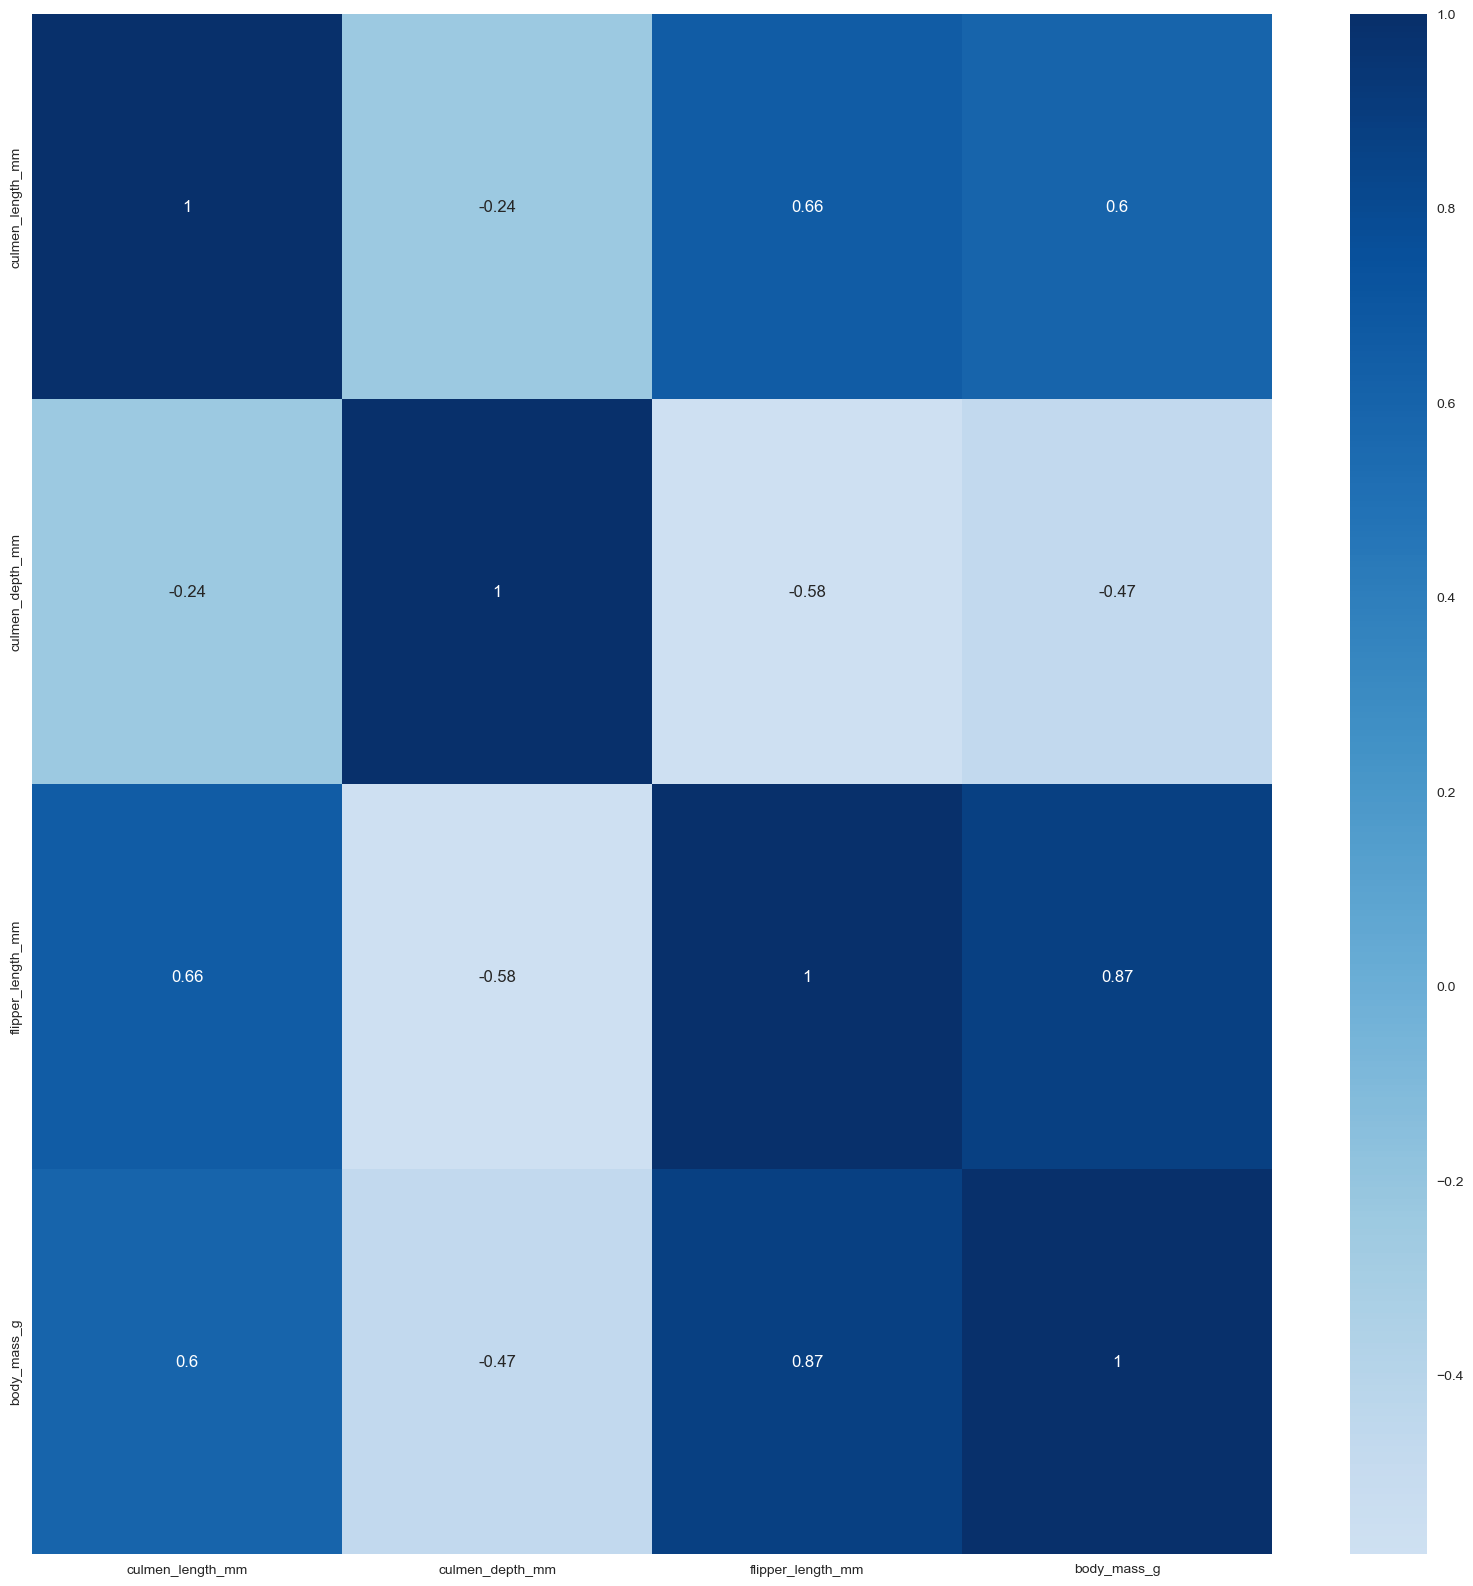

In [10]:
# Creating a correlation heatmap to visualize the correlation among the features

numeric_df = df.select_dtypes(include=['float64', 'int64'])
corrmat = numeric_df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat, annot=True, cmap='Blues', center=0)
plt.show()

---

# Data Preprocessing

##### Null Values

In [11]:
#Checking for null values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

Total   Percent
sex                   10  0.029070
culmen_length_mm       2  0.005814
culmen_depth_mm        2  0.005814
flipper_length_mm      2  0.005814
body_mass_g            2  0.005814
species                0  0.000000

In [12]:
# Imputing the null values by the mean of the respective columns
columns_to_impute = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

for column in columns_to_impute:
    mean_value = df[column].mean()
    df[column] = df[column].fillna(mean_value)

In [13]:
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [14]:
null_indices = df[df['sex'].isnull()].index
null_indices

# Replace the 3rd null value and the last 4 null values with 'MALE' (Upon inspection of the data)
df.loc[null_indices[2], 'sex'] = 'MALE'
df.loc[null_indices[-4:], 'sex'] = 'MALE'

df['sex'] = df['sex'].fillna('FEMALE')

# Replace '.' in the `sex` column with 'FEMALE' (Upon inspection of the data)
df['sex'] = df['sex'].replace('.', 'MALE')

In [15]:
#Re-checking for null values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(5))

print("All null values have been successfully imputed")

                   Total  Percent
species                0      0.0
island                 0      0.0
culmen_length_mm       0      0.0
culmen_depth_mm        0      0.0
flipper_length_mm      0      0.0
All null values have been successfully imputed


#### Duplicates

In [16]:
# Find and display duplicate rows
duplicates = df[df.duplicated()]
duplicates

Empty DataFrame
Columns: [species, island, culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []

No duplicate rows observed in the data

---

# EDA - After Cleaning the Data

In [17]:
df.describe().T

count         mean         std     min       25%      50%  \
culmen_length_mm   344.0    43.921930    5.443643    32.1    39.275    44.25   
culmen_depth_mm    344.0    17.151170    1.969027    13.1    15.600    17.30   
flipper_length_mm  344.0   200.915205   14.020657   172.0   190.000   197.00   
body_mass_g        344.0  4201.754386  799.613058  2700.0  3550.000  4050.00   

                      75%     max  
culmen_length_mm     48.5    59.6  
culmen_depth_mm      18.7    21.5  
flipper_length_mm   213.0   231.0  
body_mass_g        4750.0  6300.0

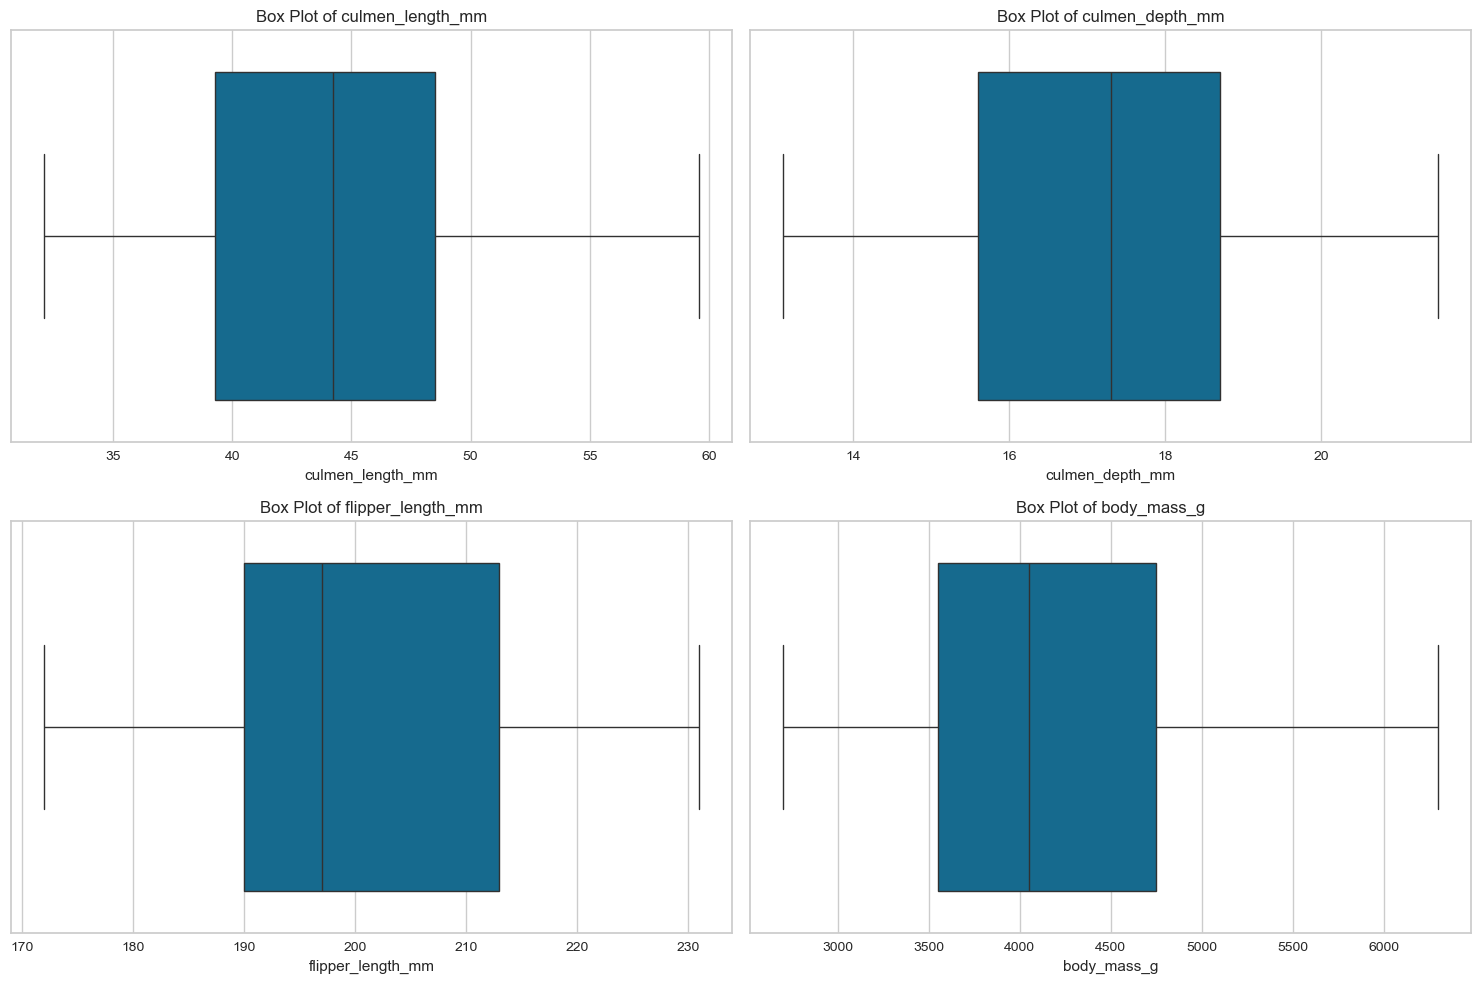

In [18]:
# Creating subplots
n_cols = 2 
n_rows = -(-len(num_cols) // n_cols) 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, column in enumerate(num_cols):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_xlabel(column)

for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

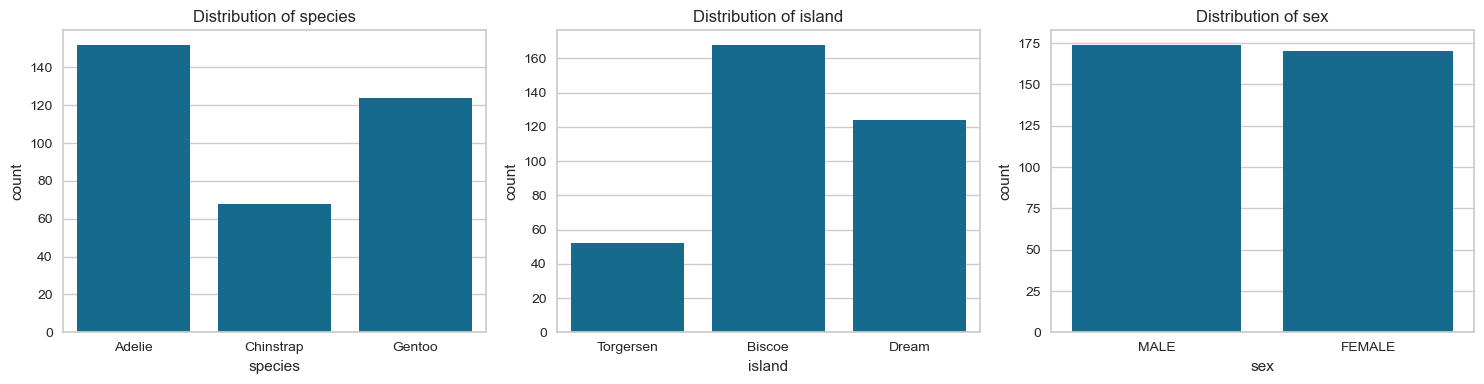

In [19]:
# Obtaining the list of categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Creating subplots
n_cols = 3  
n_rows = -(-len(cat_cols) // n_cols)  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, ax=axes[i], legend=False)
    axes[i].set_title(f'Distribution of {col}')

for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

<Figure size 800x550 with 0 Axes>

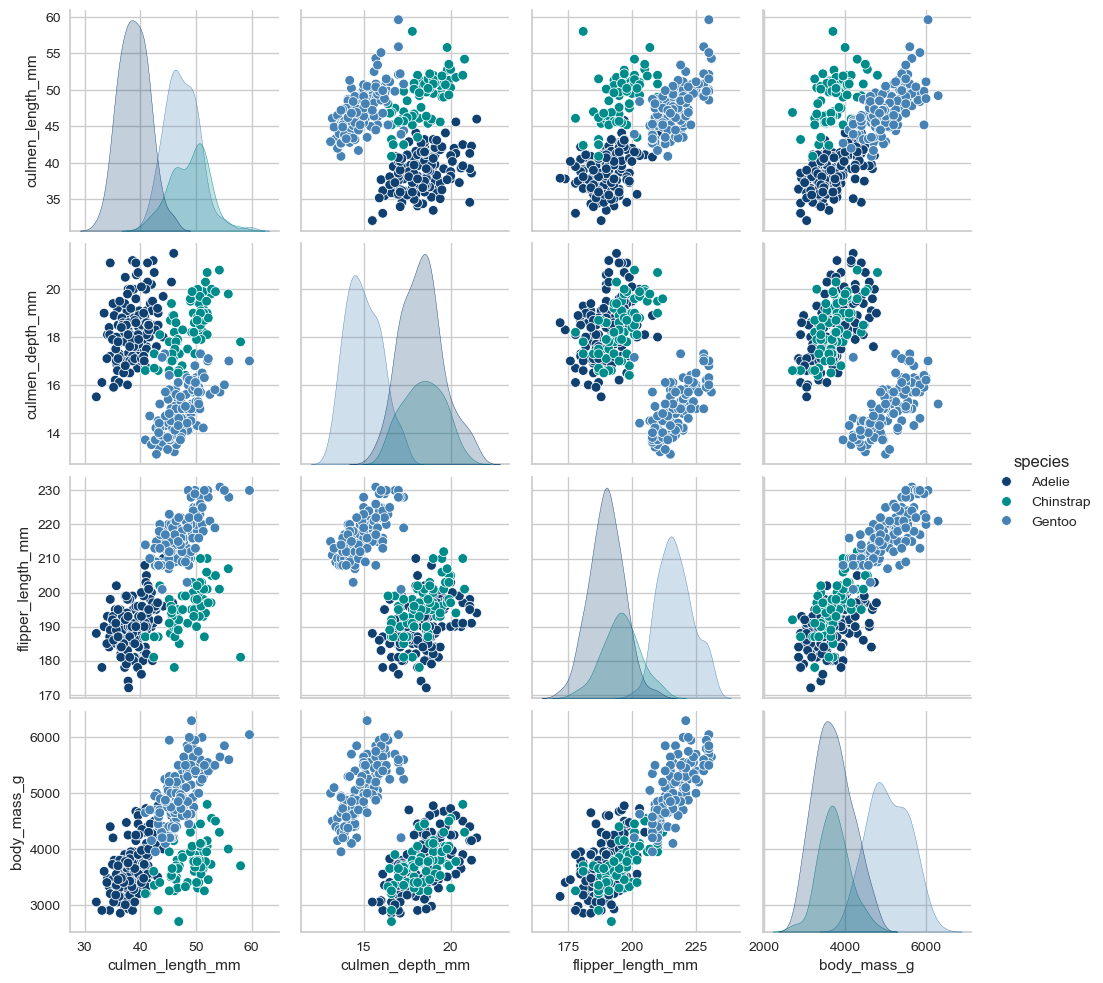

In [20]:
# Scatterplot
plt.figure()
sns.pairplot(df, hue='species', palette=['#104070','darkcyan','steelblue'])

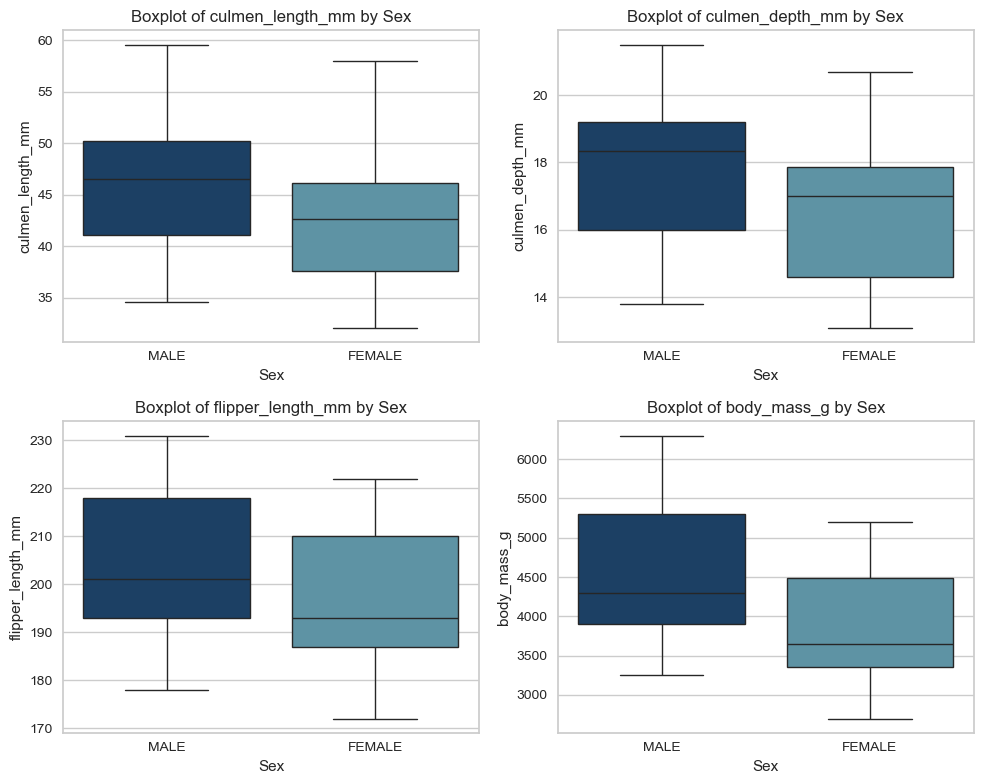

In [21]:
#Subplot grid with boxplots based on sex
num_plots = len(num_cols)
cols = 2 
rows = (num_plots // cols) + (num_plots % cols > 0) 
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x='sex', y=col, hue='sex', palette=['#104070','#5299B0'], ax=axes[i], legend=False)
    axes[i].set_title(f'Boxplot of {col} by Sex')
    axes[i].set_xlabel('Sex')
    axes[i].set_ylabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

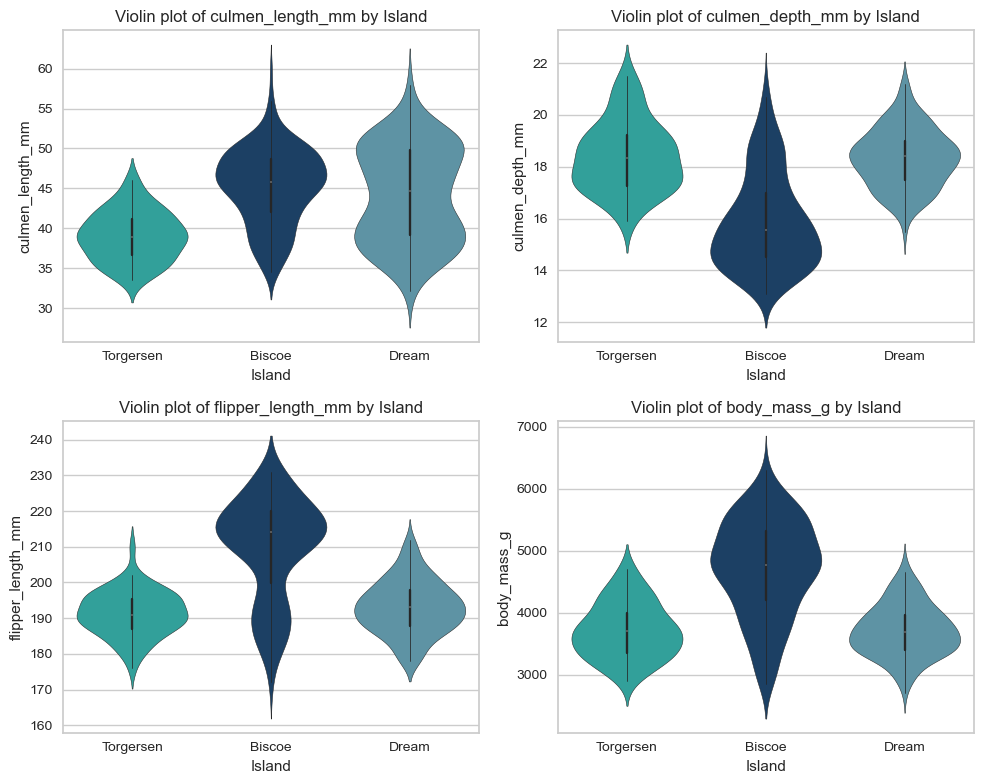

In [22]:
#Subplots with violin plots based on island
num_plots = len(num_cols)
cols = 2  
rows = (num_plots // cols) + (num_plots % cols > 0) 
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.violinplot(data=df, x='island', y=col, hue='island', palette=['lightseagreen','#104070','#5299B0'], ax=axes[i], legend=False )
    axes[i].set_title(f'Violin plot of {col} by Island')
    axes[i].set_xlabel('Island')
    axes[i].set_ylabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

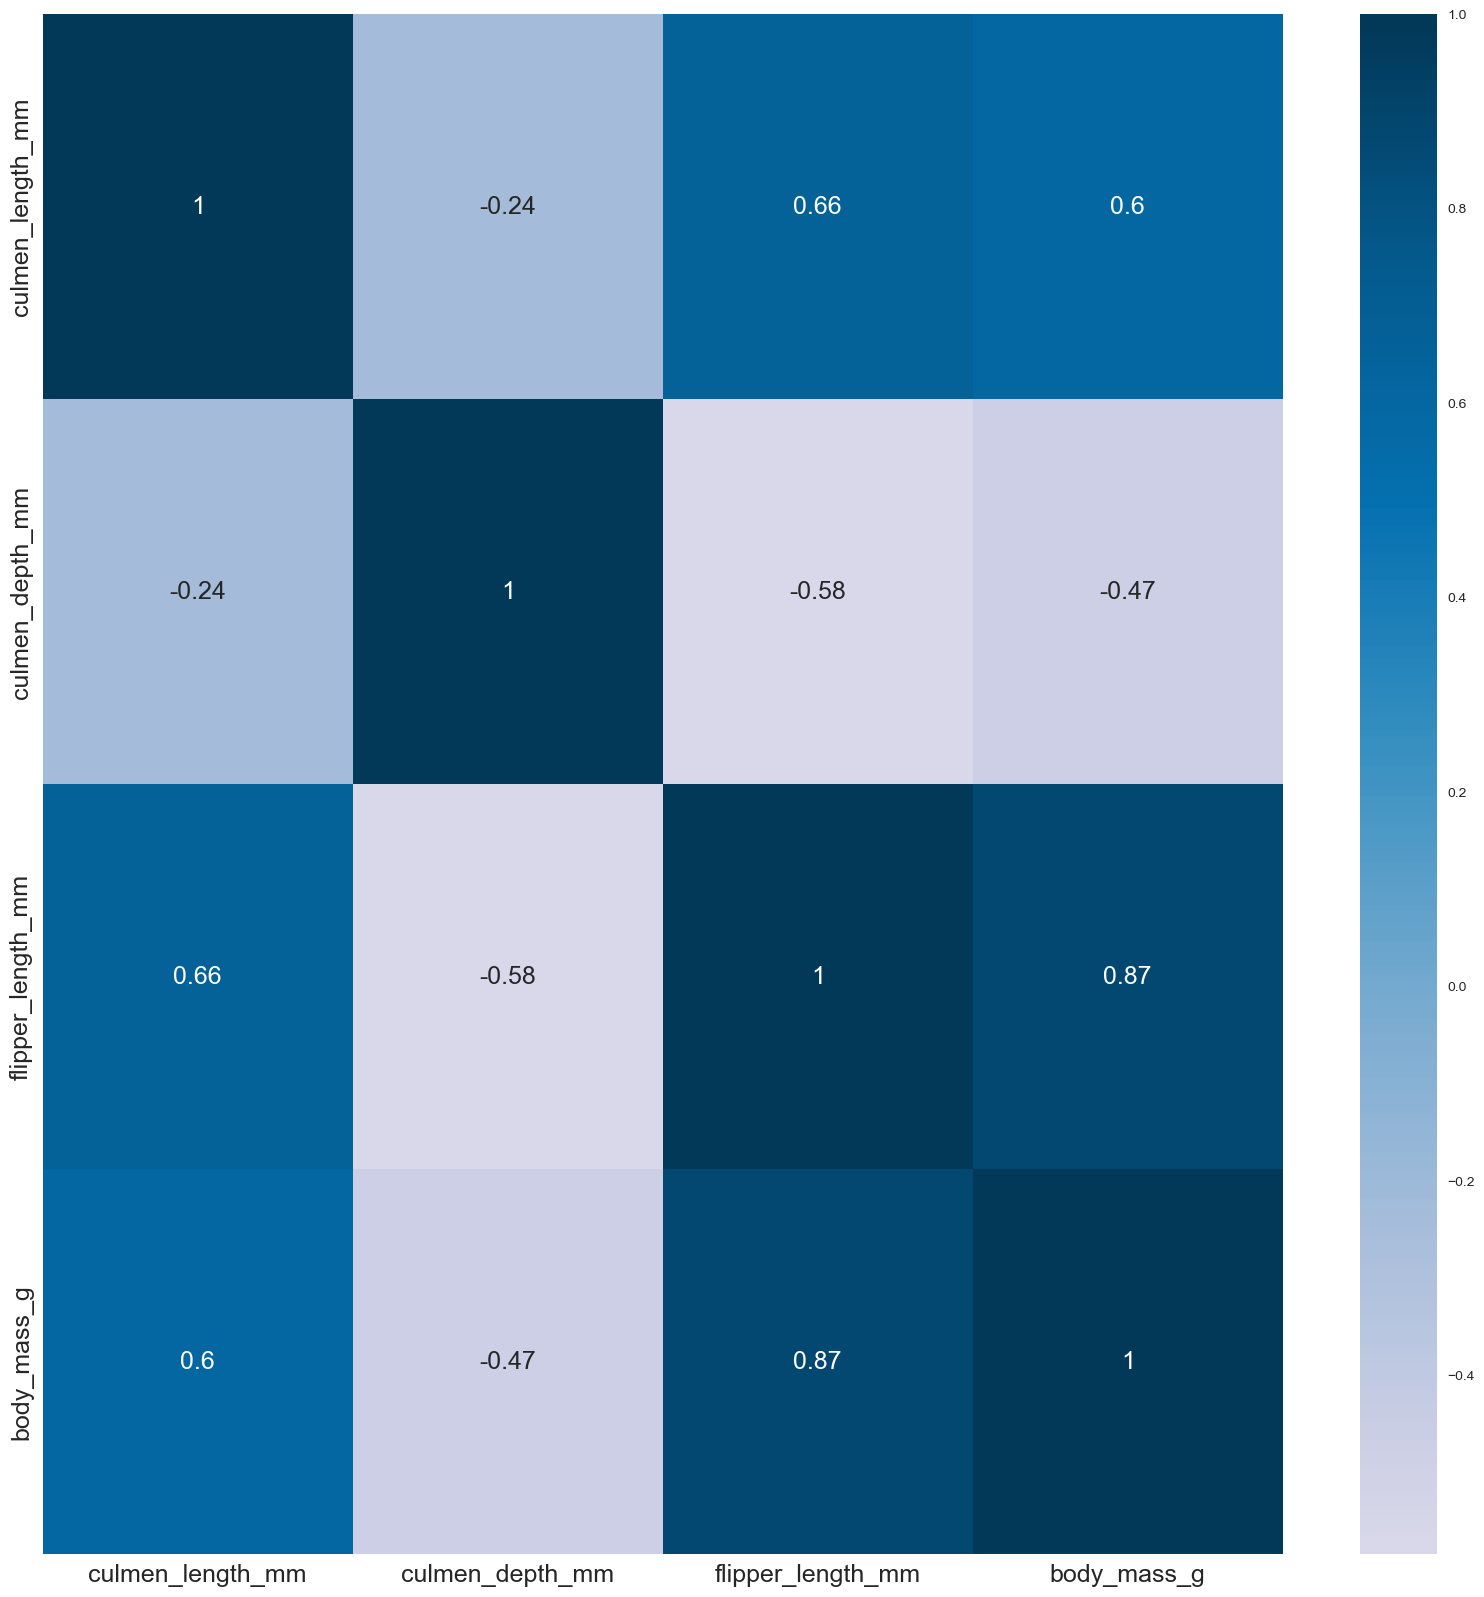

In [23]:
# Creating a correlation heatmap to visualize the correlation among the features
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corrmat = numeric_df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat, annot=True, cmap='PuBu', center=0, annot_kws={"size": 18})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

---

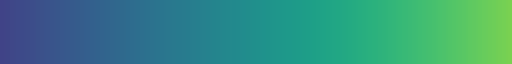

In [24]:
# Generating a custom colormap for visualisations
from matplotlib.colors import ListedColormap
viridis = plt.cm.viridis
n_colors = 256  
start, end = 0.2, 0.8
cmap = ListedColormap(viridis(np.linspace(start, end, n_colors)))
cmap

#### Encoding categorical entries

In [25]:
# Making a copy of the dataset before clustering
df_clustering = df.copy()

In [26]:
# Obtaining the list of categorical variables in the dataset
cat_cols = (df_clustering.dtypes == 'object')
object_cols = list(cat_cols[cat_cols].index)
print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['species', 'island', 'sex']


In [27]:
object_cols = ['species', 'island', 'sex']

# Onehot encoding the categorical columns
one_hot_encoder = OneHotEncoder(sparse_output=False) 
one_hot_encoded = one_hot_encoder.fit_transform(df_clustering[object_cols])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(object_cols))

# Concatenating the encoded columns to the original df
df_clustering = pd.concat([df_clustering.drop(object_cols, axis=1), one_hot_encoded_df], axis=1)
df_clustering

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0            39.10000         18.70000         181.000000  3750.000000   
1            39.50000         17.40000         186.000000  3800.000000   
2            40.30000         18.00000         195.000000  3250.000000   
3            43.92193         17.15117         200.915205  4201.754386   
4            36.70000         19.30000         193.000000  3450.000000   
..                ...              ...                ...          ...   
339          43.92193         17.15117         200.915205  4201.754386   
340          46.80000         14.30000         215.000000  4850.000000   
341          50.40000         15.70000         222.000000  5750.000000   
342          45.20000         14.80000         212.000000  5200.000000   
343          49.90000         16.10000         213.000000  5400.000000   

     species_Adelie  species_Chinstrap  species_Gentoo  island_Biscoe  \
0               1.0                0.0             0.0            0.0   
1               1.0                0.0             0.0            0.0   
2               1.0                0.0             0.0            0.0   
3               1.0                0.0             0.0            0.0   
4               1.0                0.0             0.0            0.0   
..              ...                ...             ...            ...   
339             0.0                0.0             1.0            1.0   
340             0.0                0.0             1.0            1.0   
341             0.0                0.0             1.0            1.0   
342             0.0                0.0             1.0            1.0   
343             0.0                0.0             1.0            1.0   

     island_Dream  island_Torgersen  sex_FEMALE  sex_MALE  
0             0.0               1.0         0.0       1.0  
1             0.0               1.0         1.0       0.0  
2             0.0               1.0         1.0       0.0  
3             0.0               1.0         1.0       0.0  
4             0.0               1.0         1.0       0.0  
..            ...               ...         ...       ...  
339           0.0               0.0         0.0       1.0  
340           0.0               0.0         1.0       0.0  
341           0.0               0.0         0.0       1.0  
342           0.0               0.0         1.0       0.0  
343           0.0               0.0         0.0       1.0  

[344 rows x 12 columns]

In [28]:
# Standardizing the data
scaler = StandardScaler()
scaler.fit(df_clustering)
df_clustering = pd.DataFrame(scaler.transform(df_clustering),columns= df_clustering.columns )
print("Standardization complete")

Standardization complete


In [29]:
# View the data after encoding and scaling
df_clustering.head()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0     -8.870812e-01     7.877425e-01          -1.422488    -0.565789   
1     -8.134940e-01     1.265563e-01          -1.065352    -0.503168   
2     -6.663195e-01     4.317192e-01          -0.422507    -1.192003   
3     -1.307172e-15     1.806927e-15           0.000000     0.000000   
4     -1.328605e+00     1.092905e+00          -0.565361    -0.941517   

   species_Adelie  species_Chinstrap  species_Gentoo  island_Biscoe  \
0        1.123903          -0.496364       -0.750757      -0.977008   
1        1.123903          -0.496364       -0.750757      -0.977008   
2        1.123903          -0.496364       -0.750757      -0.977008   
3        1.123903          -0.496364       -0.750757      -0.977008   
4        1.123903          -0.496364       -0.750757      -0.977008   

   island_Dream  island_Torgersen  sex_FEMALE  sex_MALE  
0     -0.750757           2.36968   -0.988439  0.988439  
1     -0.750757           2.36968    1.011696 -1.011696  
2     -0.750757           2.36968    1.011696 -1.011696  
3     -0.750757           2.36968    1.011696 -1.011696  
4     -0.750757           2.36968    1.011696 -1.011696

## Dimensionality Reduction

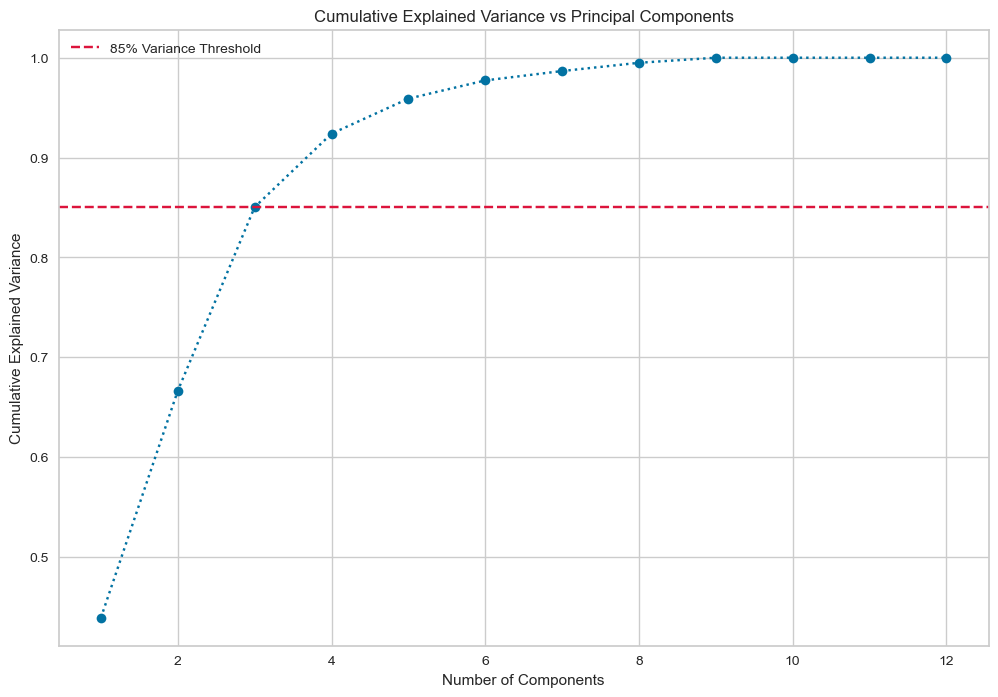

In [30]:
# Fit PCA
pca = PCA()
pca.fit(df_clustering)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(12, 8))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle=':', color='b')
plt.axhline(y=0.85, color="crimson", linestyle= "--", label="85% Variance Threshold")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance vs Principal Components")
plt.legend()
plt.show()

3 Principal Components explain 85% of the variance approximately (cumulative)

Number of components explaining more than 10% variance: 3


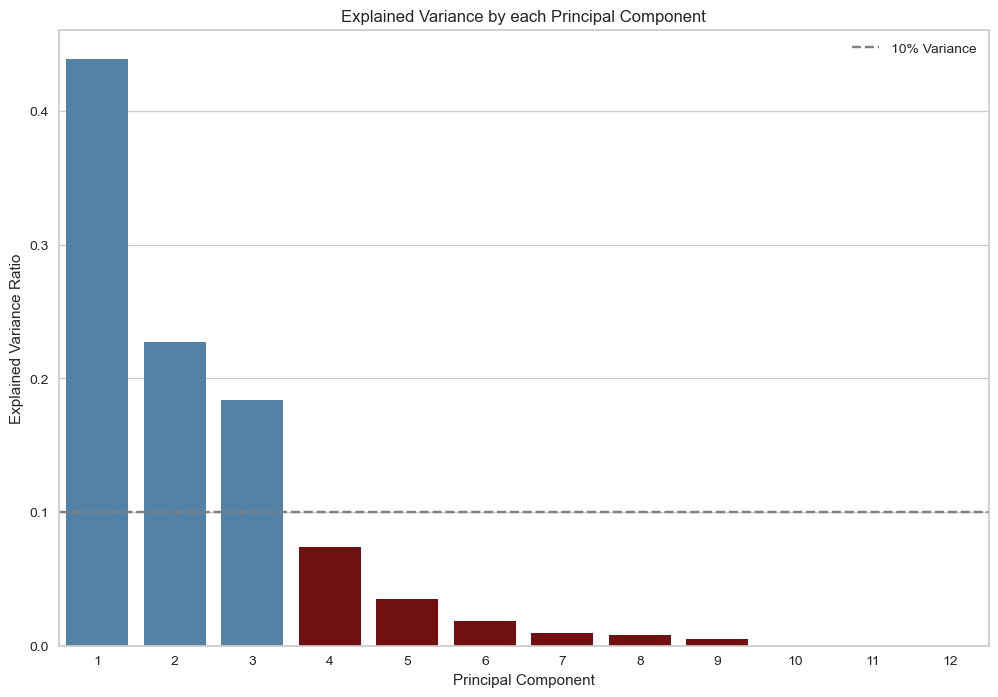

In [31]:
# Finding the number of components that explain more than 10% of the variance individually
pca = PCA(n_components=None)
pca.fit(df_clustering)

explained_variance_ratios = pca.explained_variance_ratio_

n_components = sum(explained_variance_ratios > 0.1)
print(f"Number of components explaining more than 10% variance: {n_components}")

threshold = 0.1
above_threshold = explained_variance_ratios > threshold

# Bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x=np.arange(1, len(explained_variance_ratios) + 1),
    y=explained_variance_ratios,
    hue=["steelblue" if x else "maroon" for x in above_threshold],
    palette=["steelblue", "maroon"],
    legend=False
)
plt.axhline(y=threshold, color="gray", linestyle="--", label="10% Variance")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance by each Principal Component")
plt.legend()
plt.show()


In [32]:
# Initiating PCA to reduce the dimensions to 3
pca = PCA(n_components=3)
pca.fit(df_clustering)
PCA_df = pd.DataFrame(pca.transform(df_clustering), columns=(["PC1","PC2", "PC3"]))
PCA_df.describe().T
PCA_df.head()

PC1       PC2       PC3
0 -2.286625 -0.434890 -2.581615
1 -2.278583 -2.065531 -0.460341
2 -2.342868 -1.938173 -0.414532
3 -1.385510 -1.681058 -0.431462
4 -2.695598 -2.004111 -0.710814

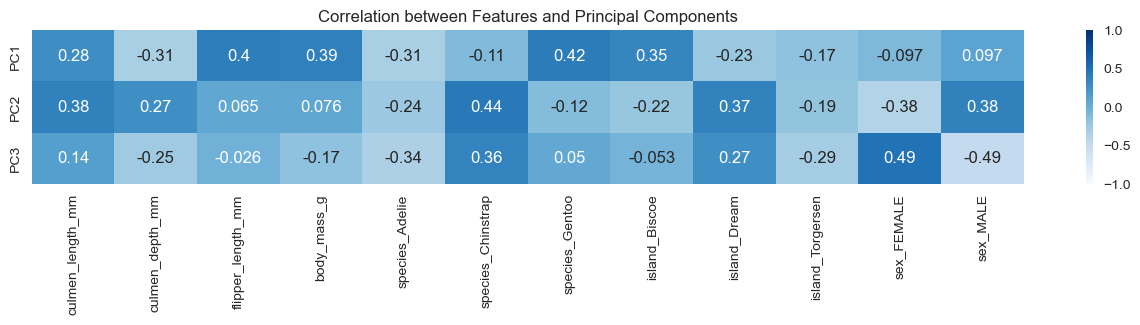

In [33]:
# Calculating the correlation between the original features and the principal components
loadings_df = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=df_clustering.columns)
loadings_df = loadings_df.T

# Heatmap
plt.figure(figsize=(16, 2))
sns.heatmap(loadings_df, annot=True, cmap="Blues", vmin=-1, vmax=1)
plt.title("Correlation between Features and Principal Components")
plt.show()

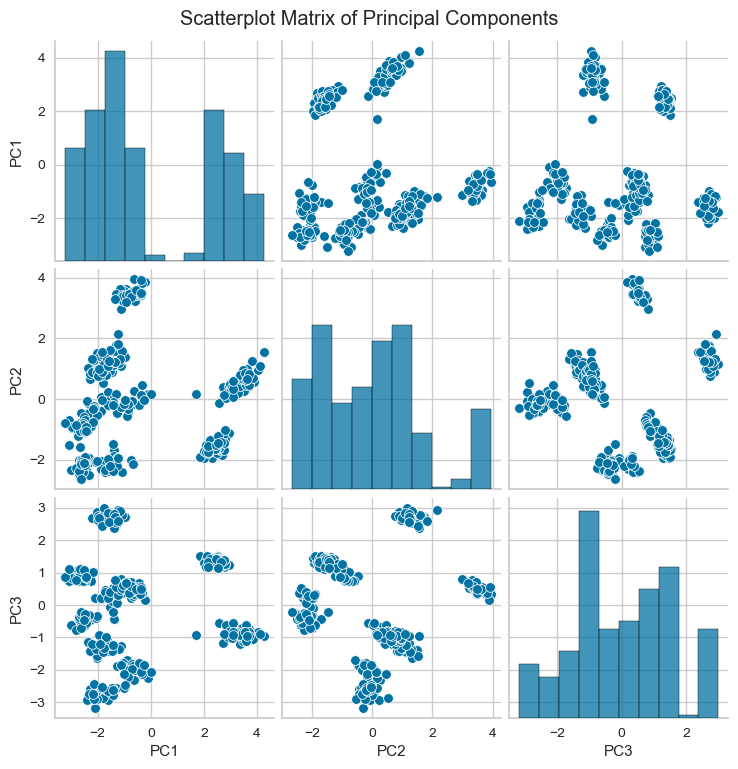

In [34]:
# Scatterplot matrix of the principal components
sns.pairplot(PCA_df)
plt.suptitle("Scatterplot Matrix of Principal Components", y=1.02)
plt.show()

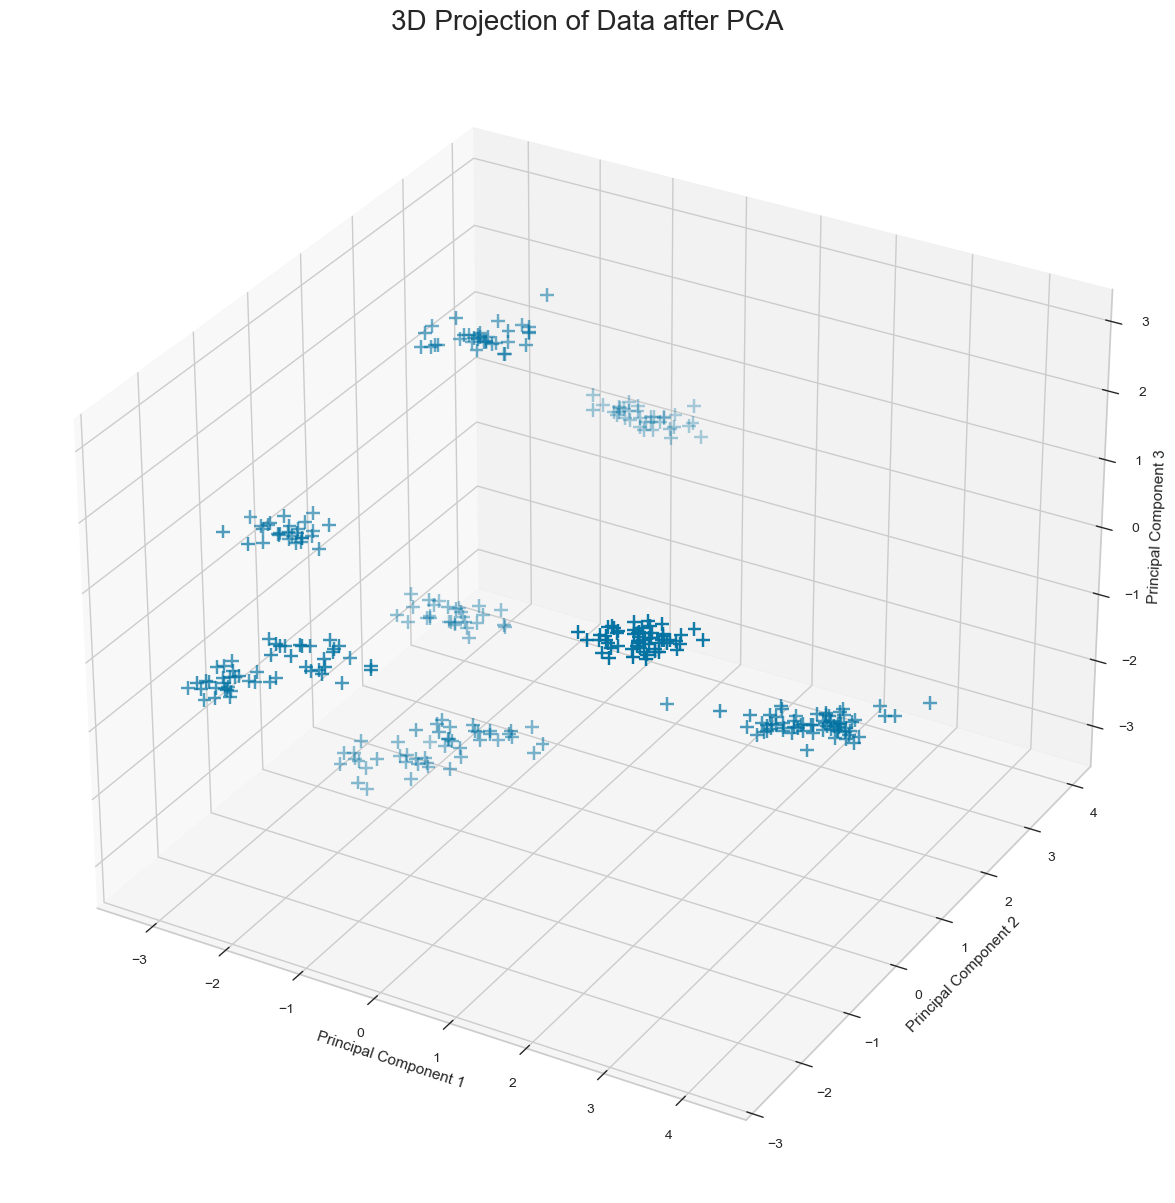

In [35]:
# 3D Projection of the Principal Components
x =PCA_df["PC1"]
y =PCA_df["PC2"]
z =PCA_df["PC3"]

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, marker='+', s=100)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Projection of Data after PCA', fontsize=20)
plt.show()

c:\Users\20246\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\20246\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\20246\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\20246\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: User

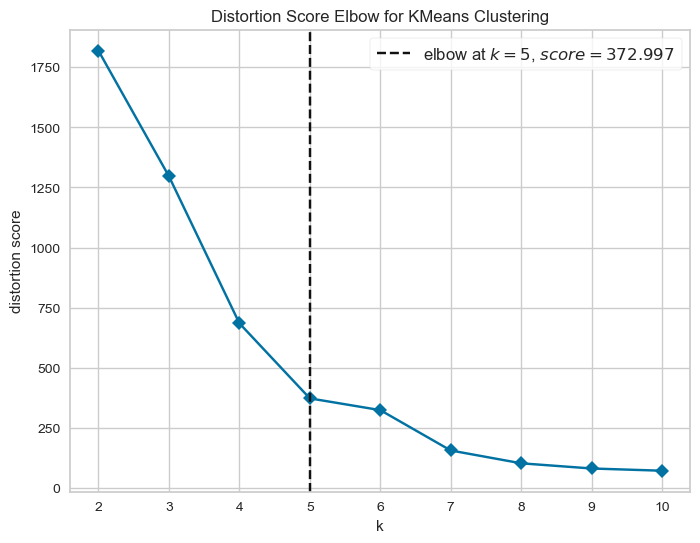

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
# Elbow method to determine the optimal number of clusters
fig, ax = plt.subplots(figsize=(8, 6)) 

Elbow_M = KElbowVisualizer(KMeans(random_state=42), k=10, metric='distortion', locate_elbow=True, timings=False, ax=ax)
Elbow_M.fit(PCA_df)
Elbow_M.show()

c:\Users\20246\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\20246\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\20246\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\20246\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: User

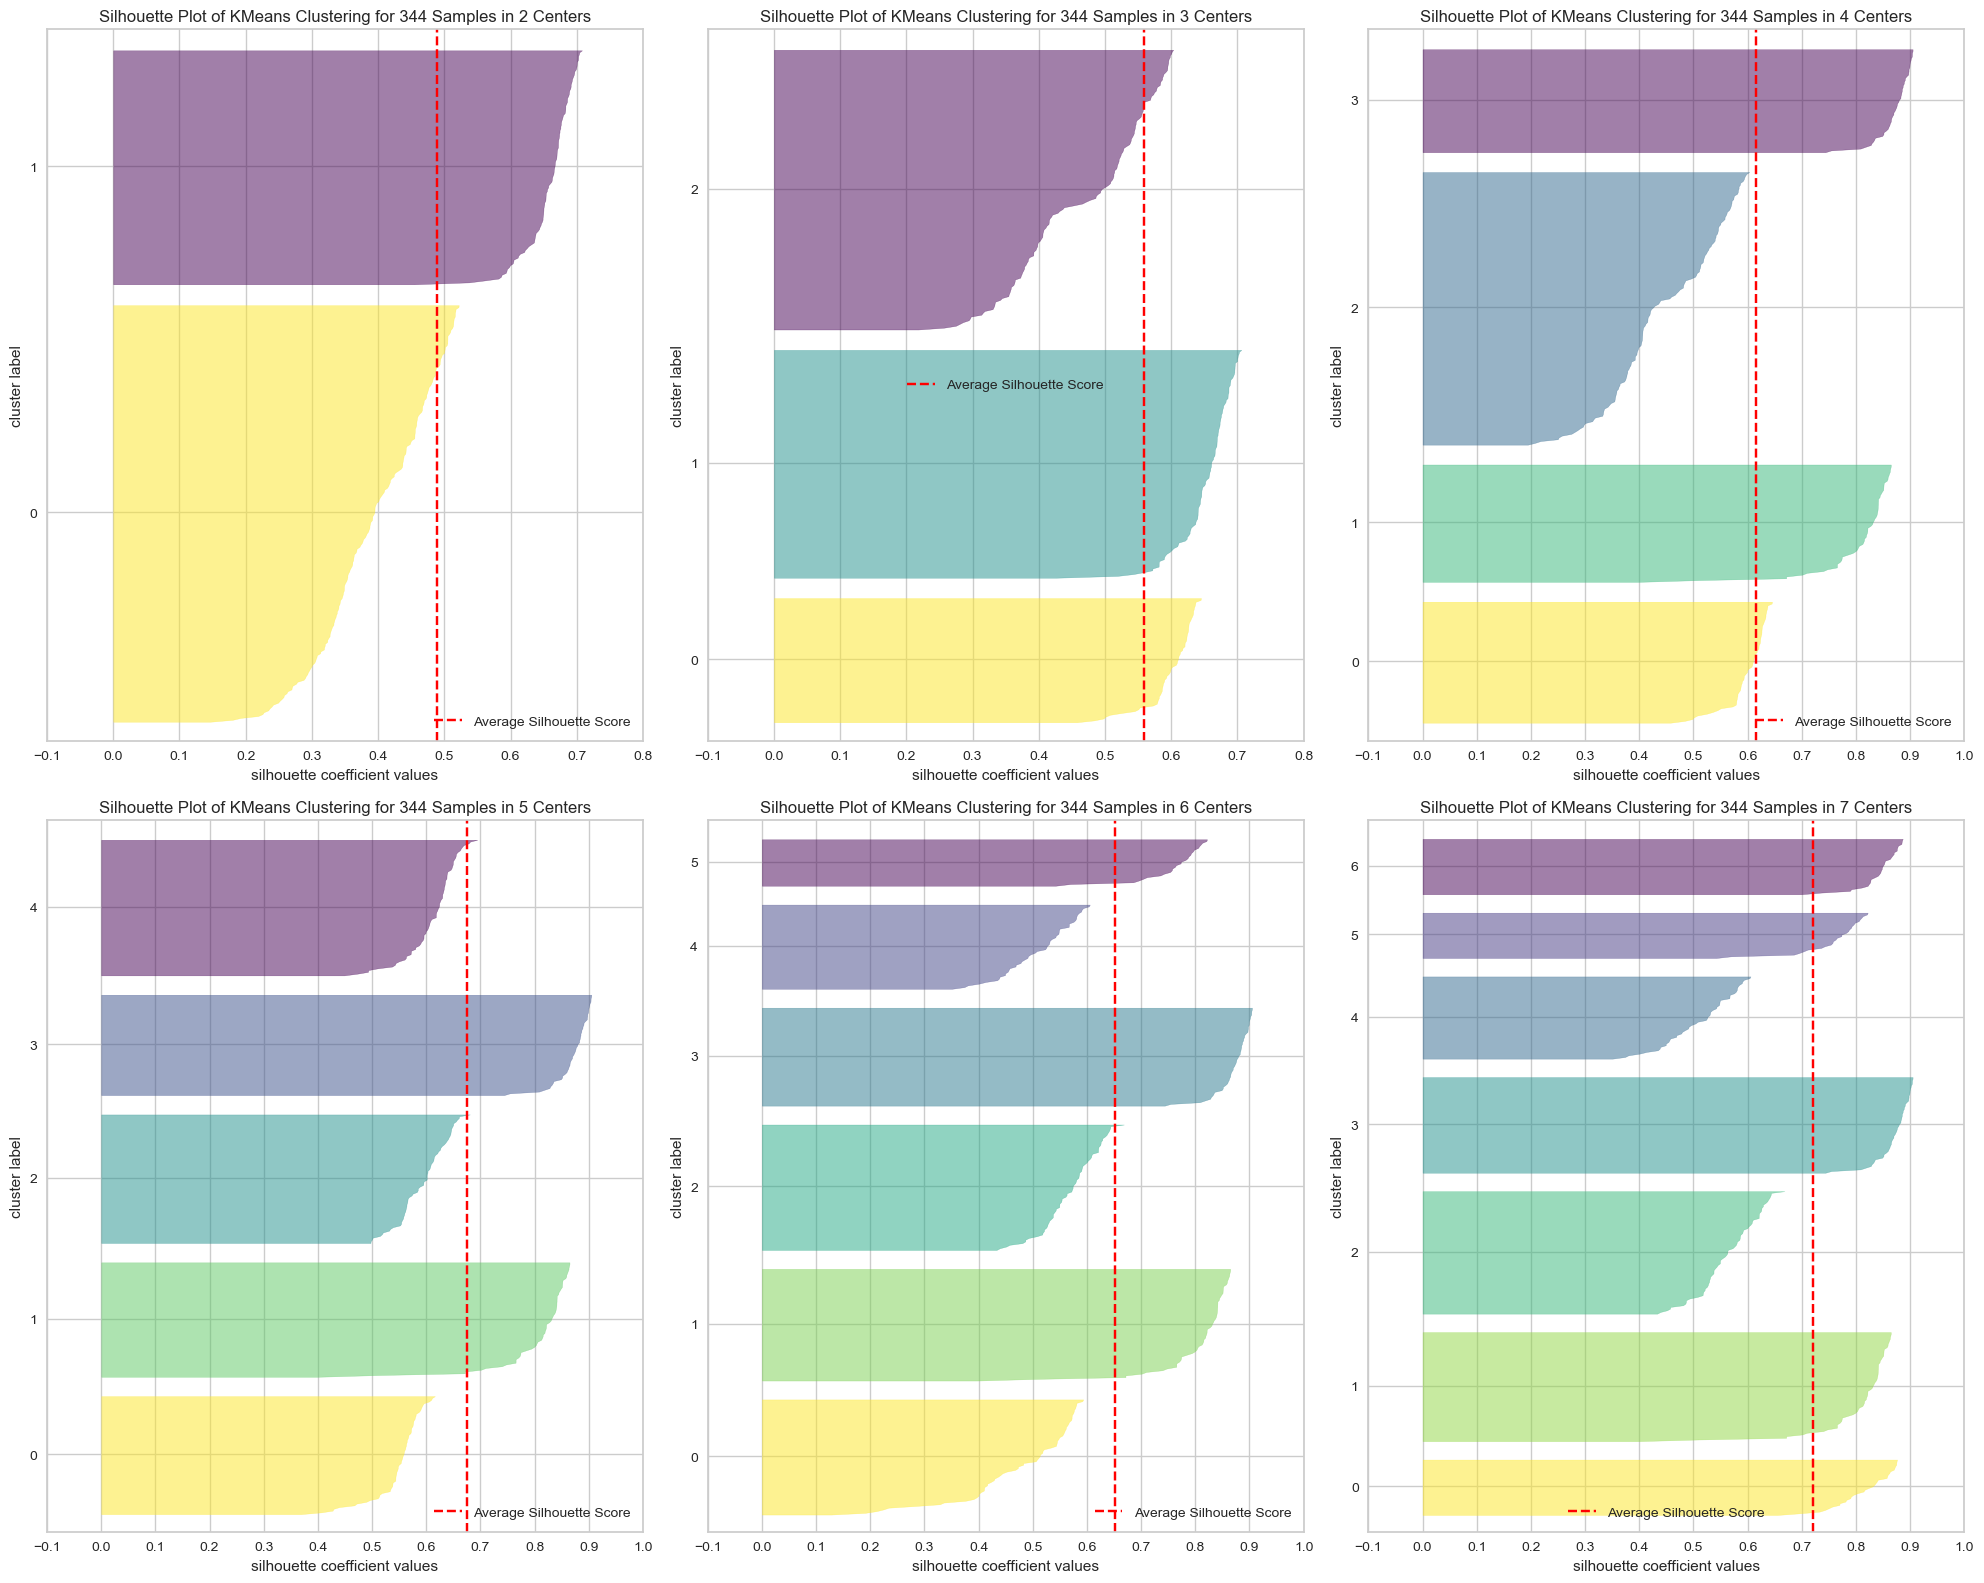

In [37]:
# Creating a silhouette plot to determine the optimal number of clusters
range_n_clusters = list(range(2, 8))
n_rows = 2
n_cols = 3

# Subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 16))
axes = axes.flatten()

for i, n_clusters in enumerate(range_n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    visualizer = SilhouetteVisualizer(kmeans, ax=axes[i], colors='viridis_r')
    visualizer.fit(PCA_df)
    visualizer.finalize()


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Clustering

In [38]:
# Initiating the K-Means algorithm with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fitting the model and predicting the clusters
yhat_kmeans = kmeans.fit_predict(PCA_df)
yhat_kmeans = yhat_kmeans + 1

# Adding the clusters to the dataframes
PCA_df["Clusters"] = yhat_kmeans
df["Clusters"] = yhat_kmeans
data["Clusters"] = yhat_kmeans

c:\Users\20246\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [39]:
# Evaluating the clustering algorithm with the Silhouette Score
sil_score = silhouette_score(PCA_df, yhat_kmeans)
print(f'Silhouette Score: {sil_score:.2f}')

Silhouette Score: 0.72


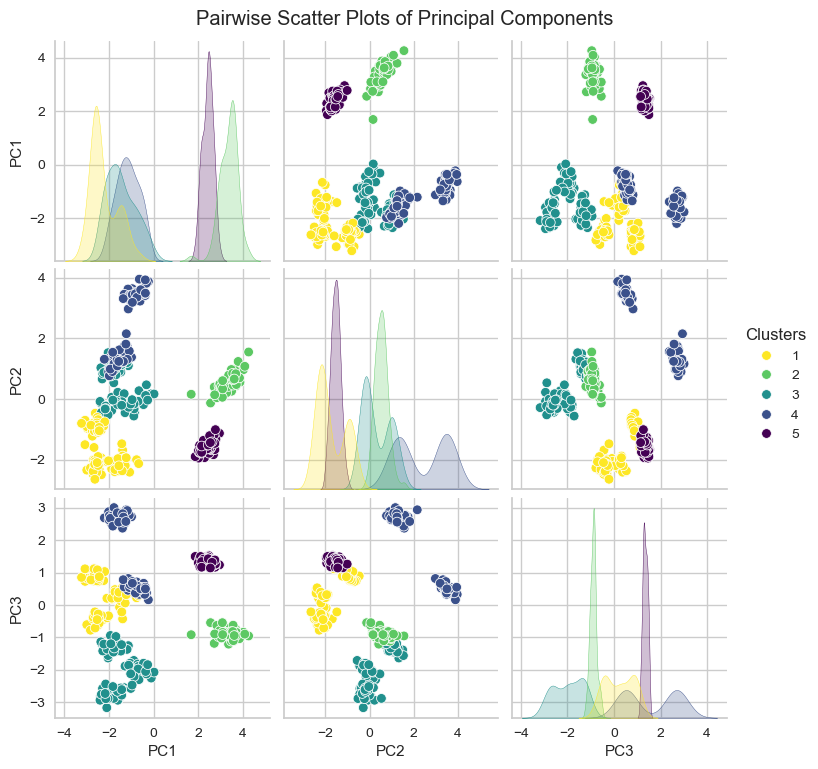

In [40]:
# Pairplot with Principal Components and Clusters
sns.pairplot(PCA_df, hue='Clusters', palette='viridis_r')
plt.suptitle("Pairwise Scatter Plots of Principal Components", y=1.02)
plt.show()

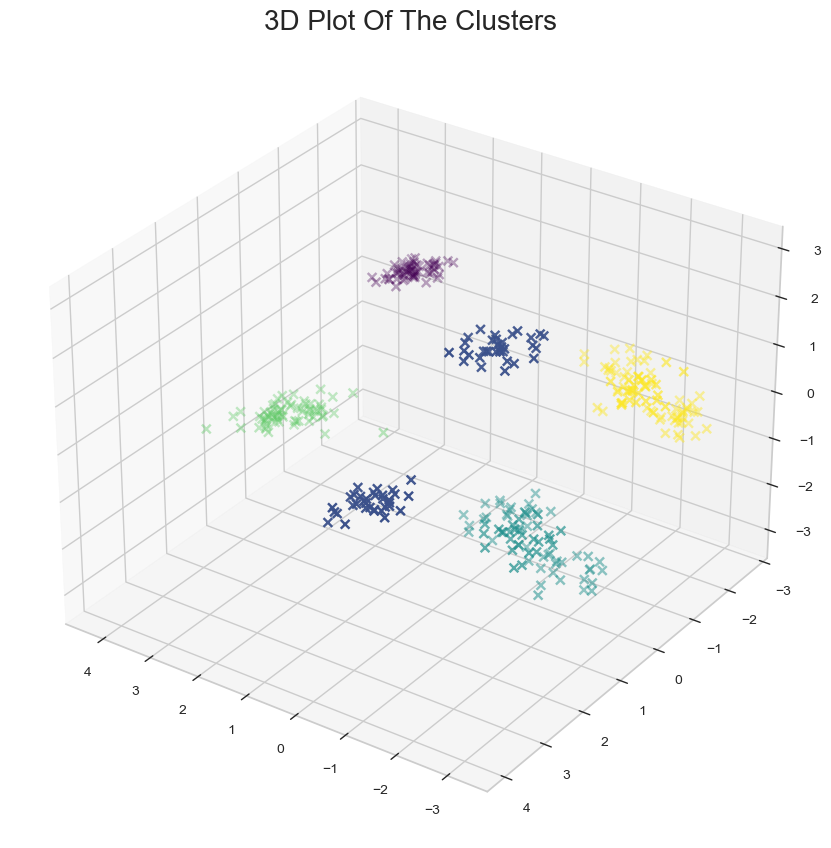

In [41]:
# Plotting the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.scatter(x, y, z, s=40, c=df["Clusters"], marker='x', cmap='viridis_r')
ax.view_init(elev=30, azim = 125)
ax.set_title("3D Plot Of The Clusters", fontsize=20)

plt.show()

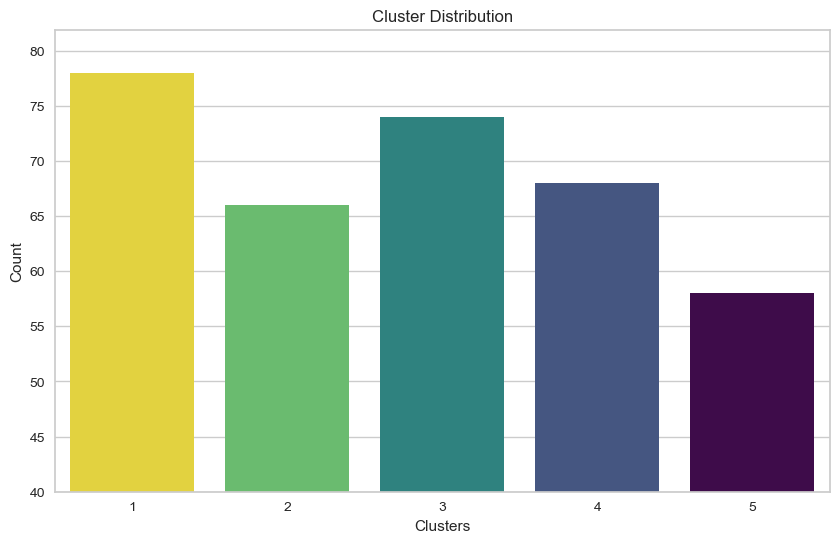

In [42]:
# Barplot to visualise the cluster counts
plt.figure(figsize=(10, 6))
pl = sns.countplot(x="Clusters", hue="Clusters", data=df, palette='viridis_r', legend=False)
pl.set_title('Cluster Distribution')
pl.set_xlabel('Clusters')
pl.set_ylabel('Count')
pl.set_ylim(40, pl.get_ylim()[1])

plt.show()

# Cluster Analysis

Scatterplot with the clusters


<Figure size 800x550 with 0 Axes>

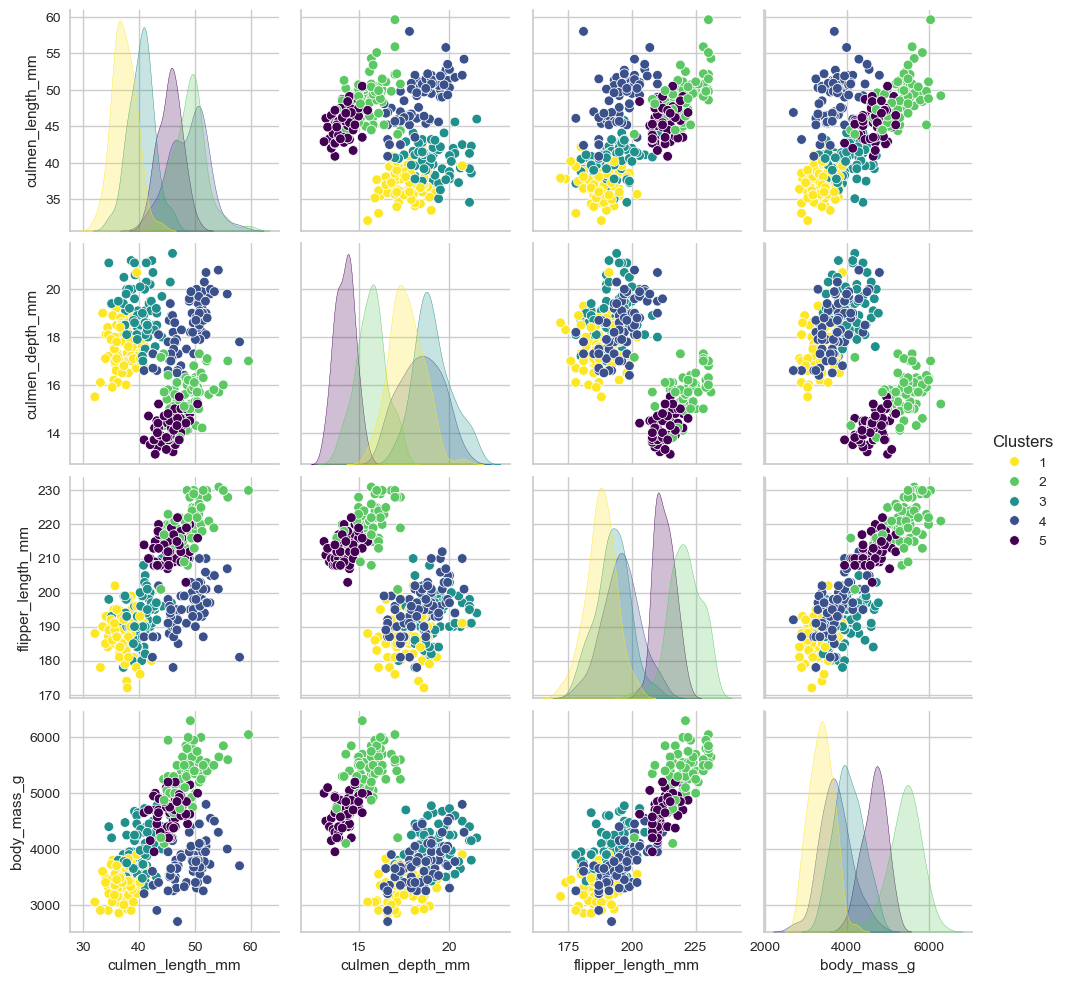

In [43]:
# Scatterplot matrix of the original features with the clusters
print("Scatterplot with the clusters")
plt.figure()
sns.pairplot(df, hue='Clusters', palette='viridis_r')
plt.show()

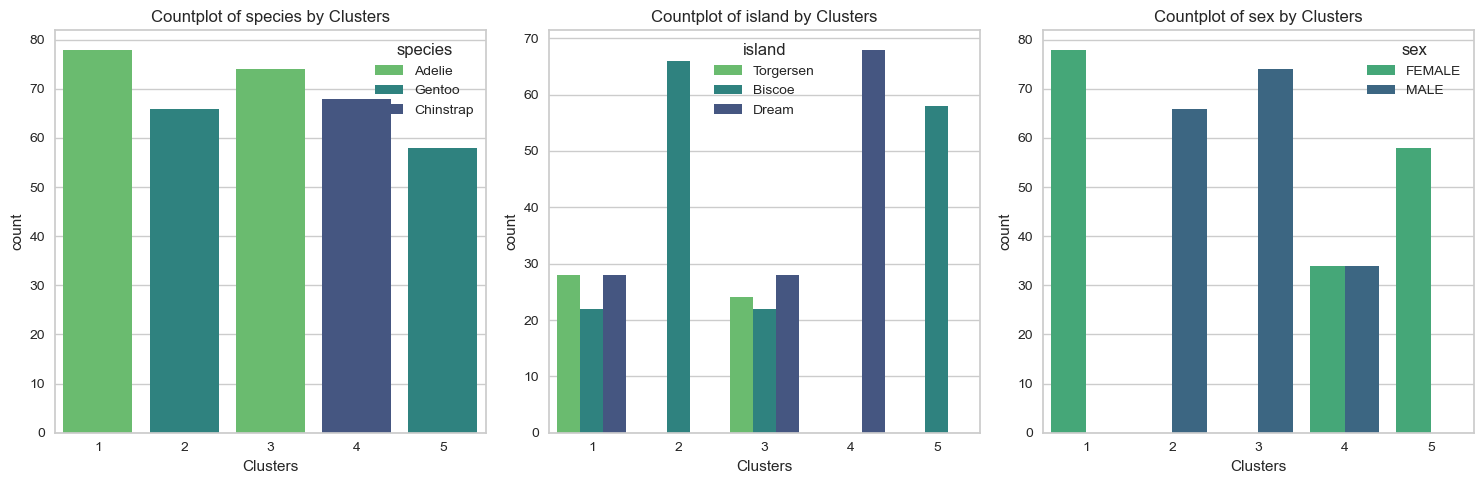

In [44]:
# Visualising the categorical features by clusters
cat_cols = ['species', 'island', 'sex'] 
n_cols = 3 
n_rows = int(np.ceil(len(cat_cols) / n_cols)) 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=df["Clusters"], hue=df[col], ax=axes[i], palette='viridis_r')
    axes[i].set_title(f'Countplot of {col} by Clusters')

for i in range(len(cat_cols), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

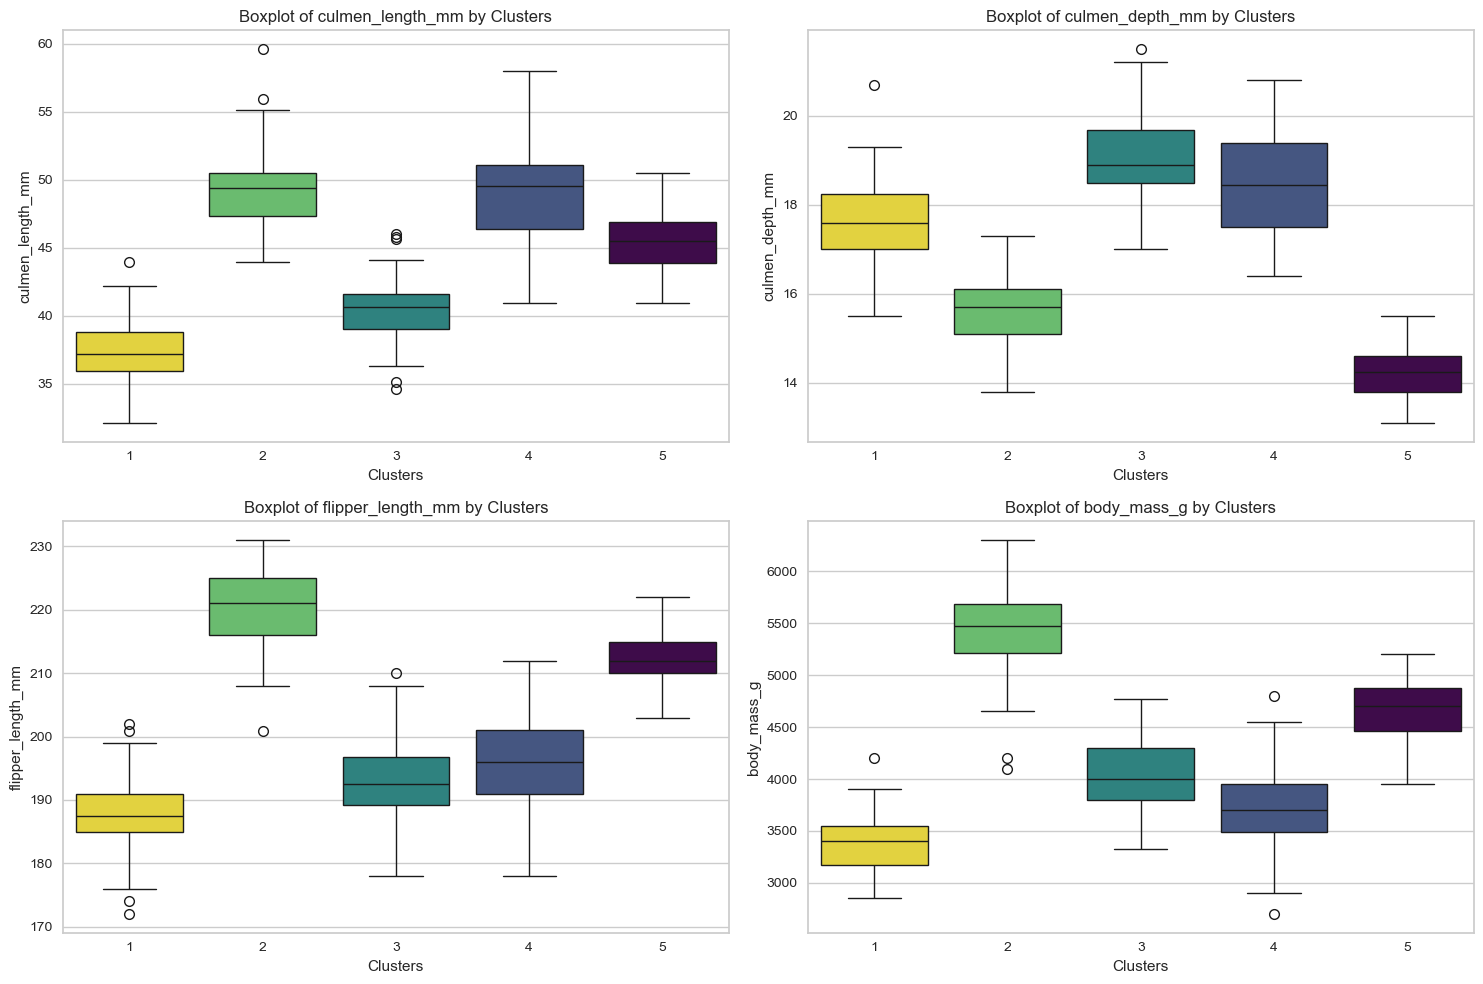

In [45]:
# Visualising the numerical features by clusters
box_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g']

n_cols = 2 
n_rows = int(np.ceil(len(box_cols) / n_cols)) 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(box_cols):
    sns.boxplot(x=df["Clusters"], y=df[col], ax=axes[i], hue=df["Clusters"], palette='viridis_r',legend=False)
    axes[i].set_title(f'Boxplot of {col} by Clusters')

for i in range(len(box_cols), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

---

# <u>**Supervised Learning**</u>

# **Regression**

In [46]:
# Importing libraries for data wrangling and visualisation
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Suppress warnings
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

### Dataset Link
https://www.kaggle.com/datasets/mirichoi0218/insurance/data


In [47]:
# Importing the dataset
df = pd.read_csv('C:\\Users\\20246\\Desktop\\ML Coursework\\insurance.csv')
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [48]:
# Checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [49]:
# Checking the dataset statistics
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [50]:
# Color palette for visualisations
palette=['#104070','#5299B0', '#79C7E3', '#BFF0FF', 'lightsteelblue', 'slategray',]
palette

['#104070', '#5299B0', '#79C7E3', '#BFF0FF', 'lightsteelblue', 'slategray']

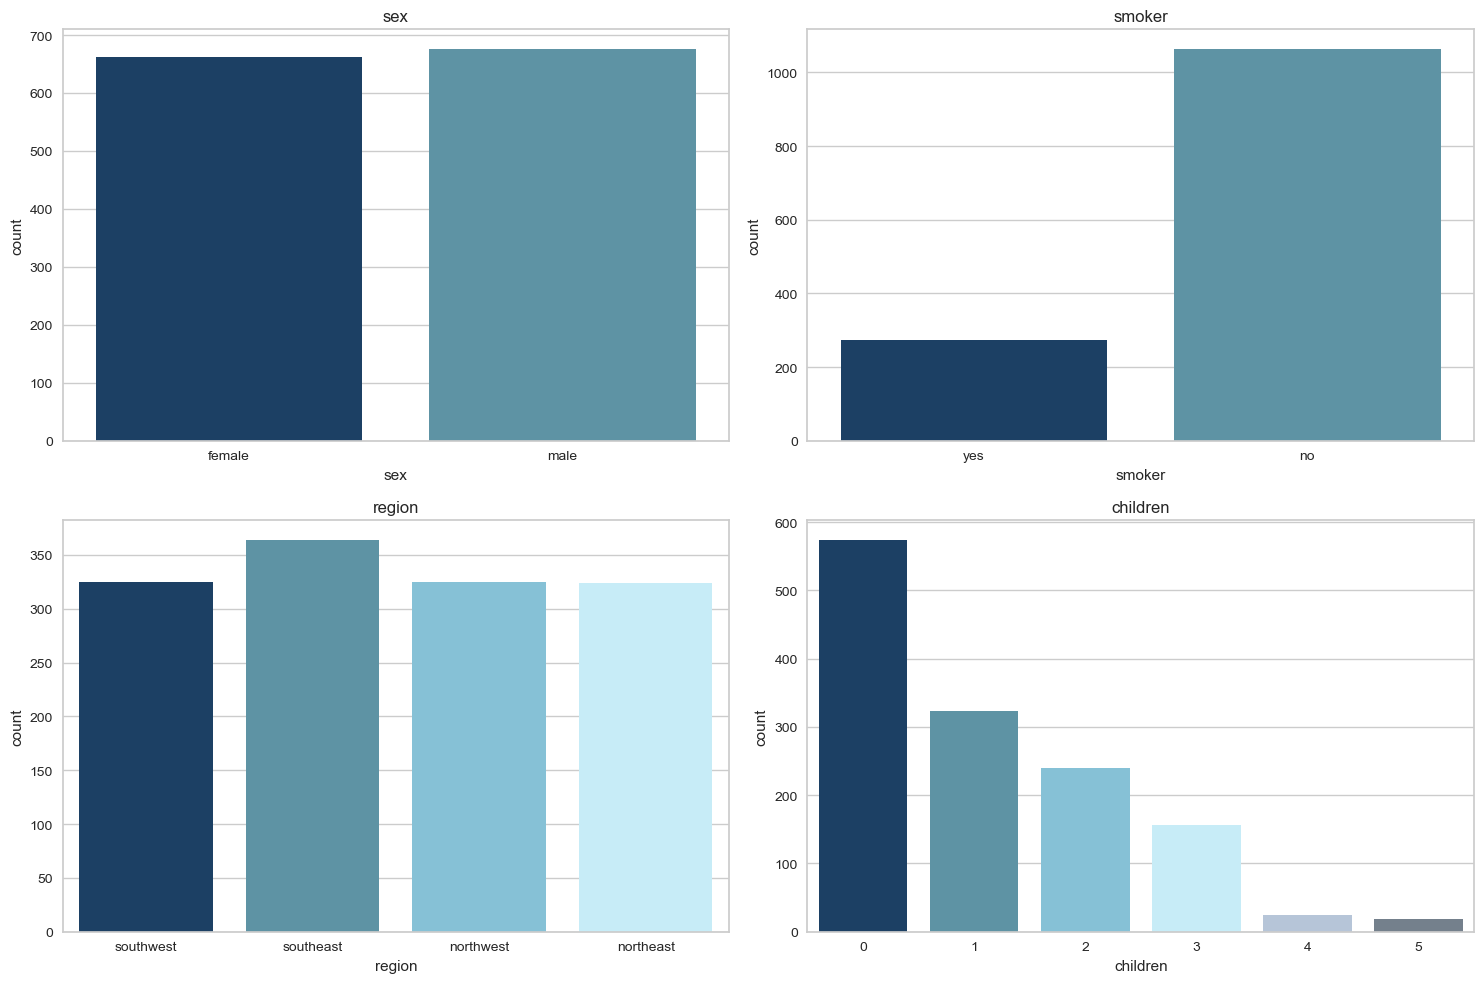

In [51]:
# Visualising the distribution of the categorical columns
cat_cols = ['sex', 'smoker', 'region', 'children']

# Subplot
n_cols = 2
n_rows = (len(cat_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for ax, col in zip(axes, cat_cols):
    sns.countplot(x=col, data=df, ax=ax, palette=palette)
    ax.set_title(f'{col}')
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

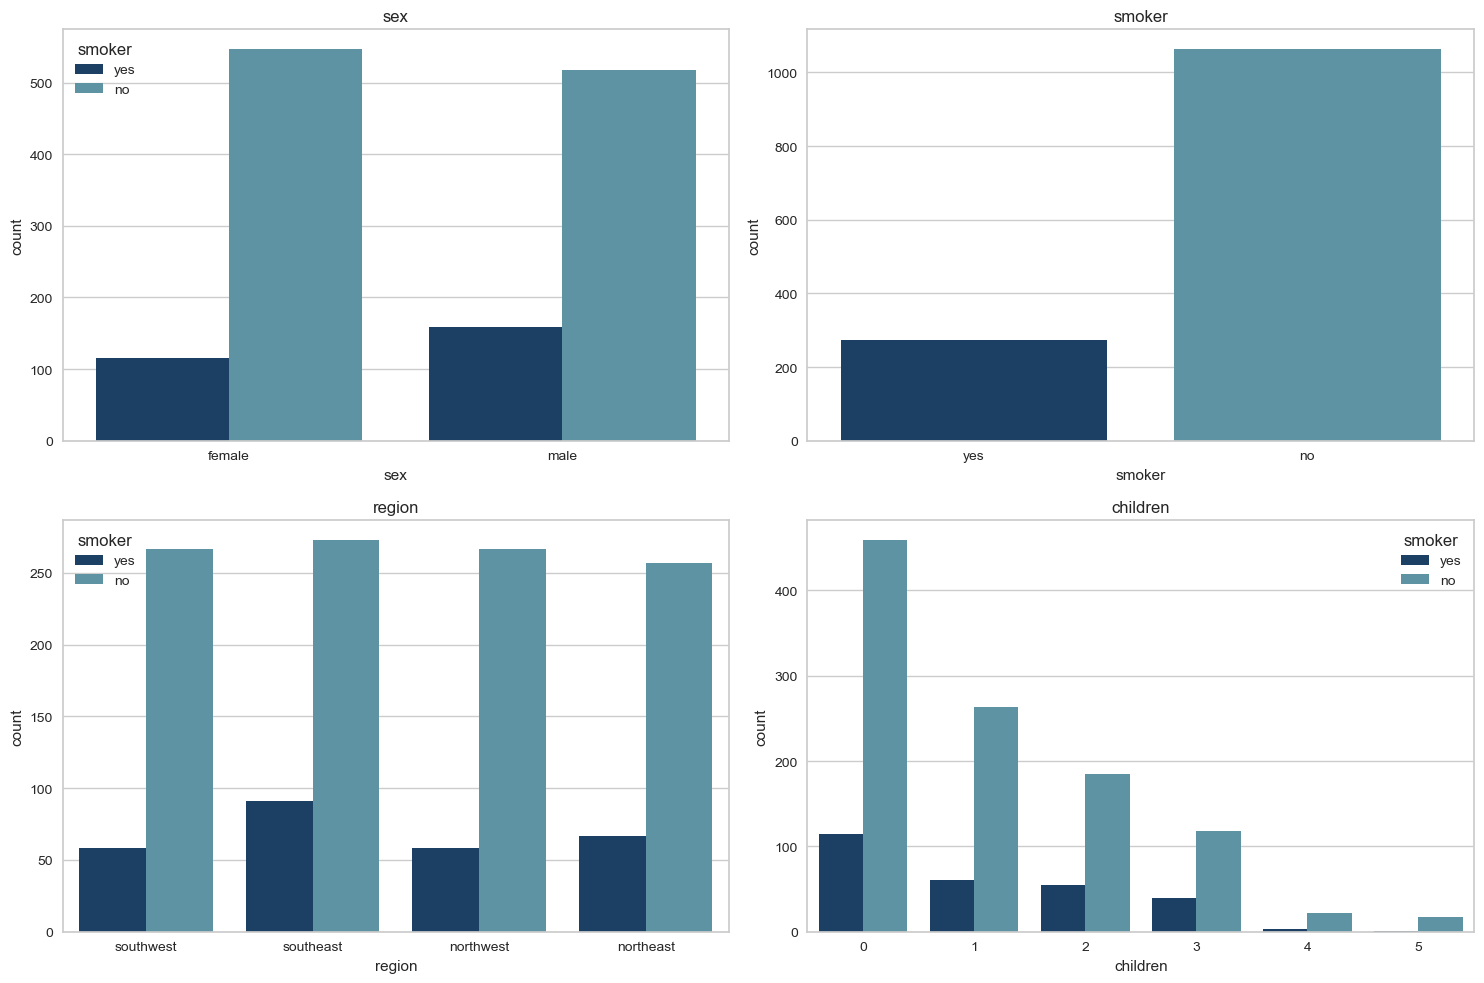

In [52]:
# Visualising the distribution of the categorical columns based on smoking status
cat_cols = ['sex', 'smoker', 'region', 'children']

# Subplot
n_cols = 2
n_rows = (len(cat_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for ax, col in zip(axes, cat_cols):
    sns.countplot(x=col, data=df, ax=ax, hue='smoker', palette=palette)
    ax.set_title(f'{col}')
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

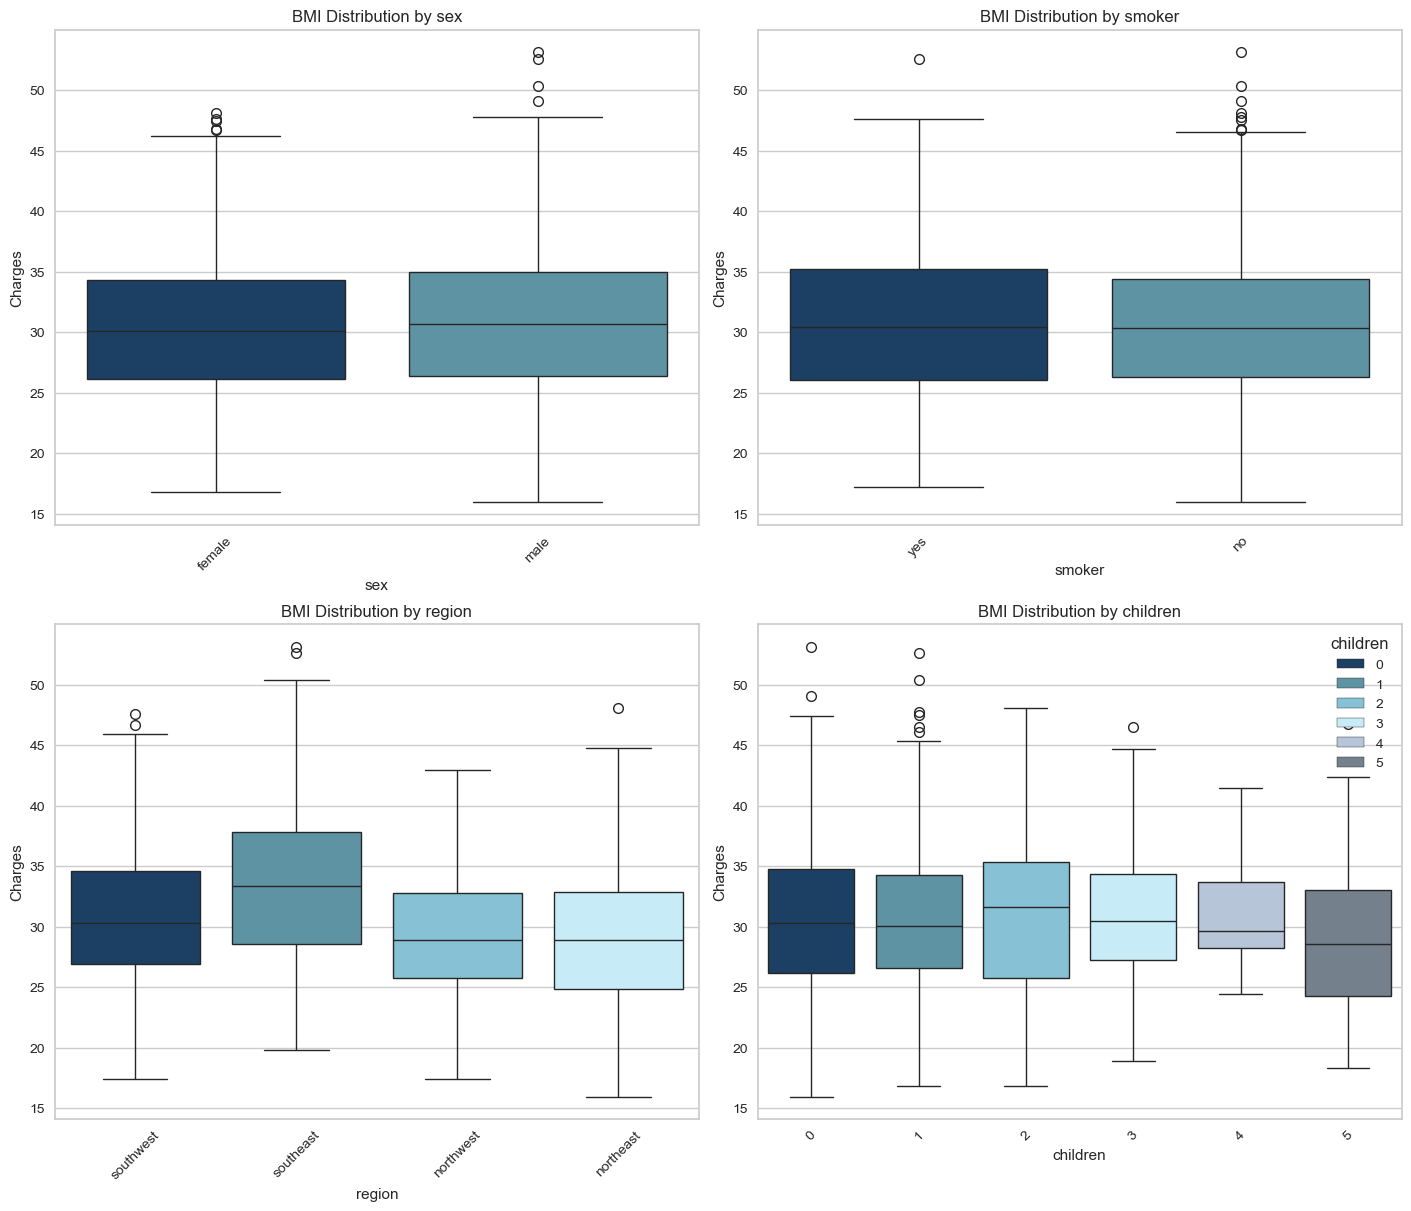

In [53]:
# Visualising the distribution of the BMI based on categorical columns
# Subplot
n_cols = 2
n_rows = math.ceil(len(cat_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 6 * n_rows), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.boxplot(data=df, x=col, y='bmi', hue=col, palette=palette, ax=axes[i], dodge=False)
    axes[i].set_title(f'BMI Distribution by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Charges')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(len(cat_cols), len(axes)):
    axes[j].set_visible(False)

plt.show()

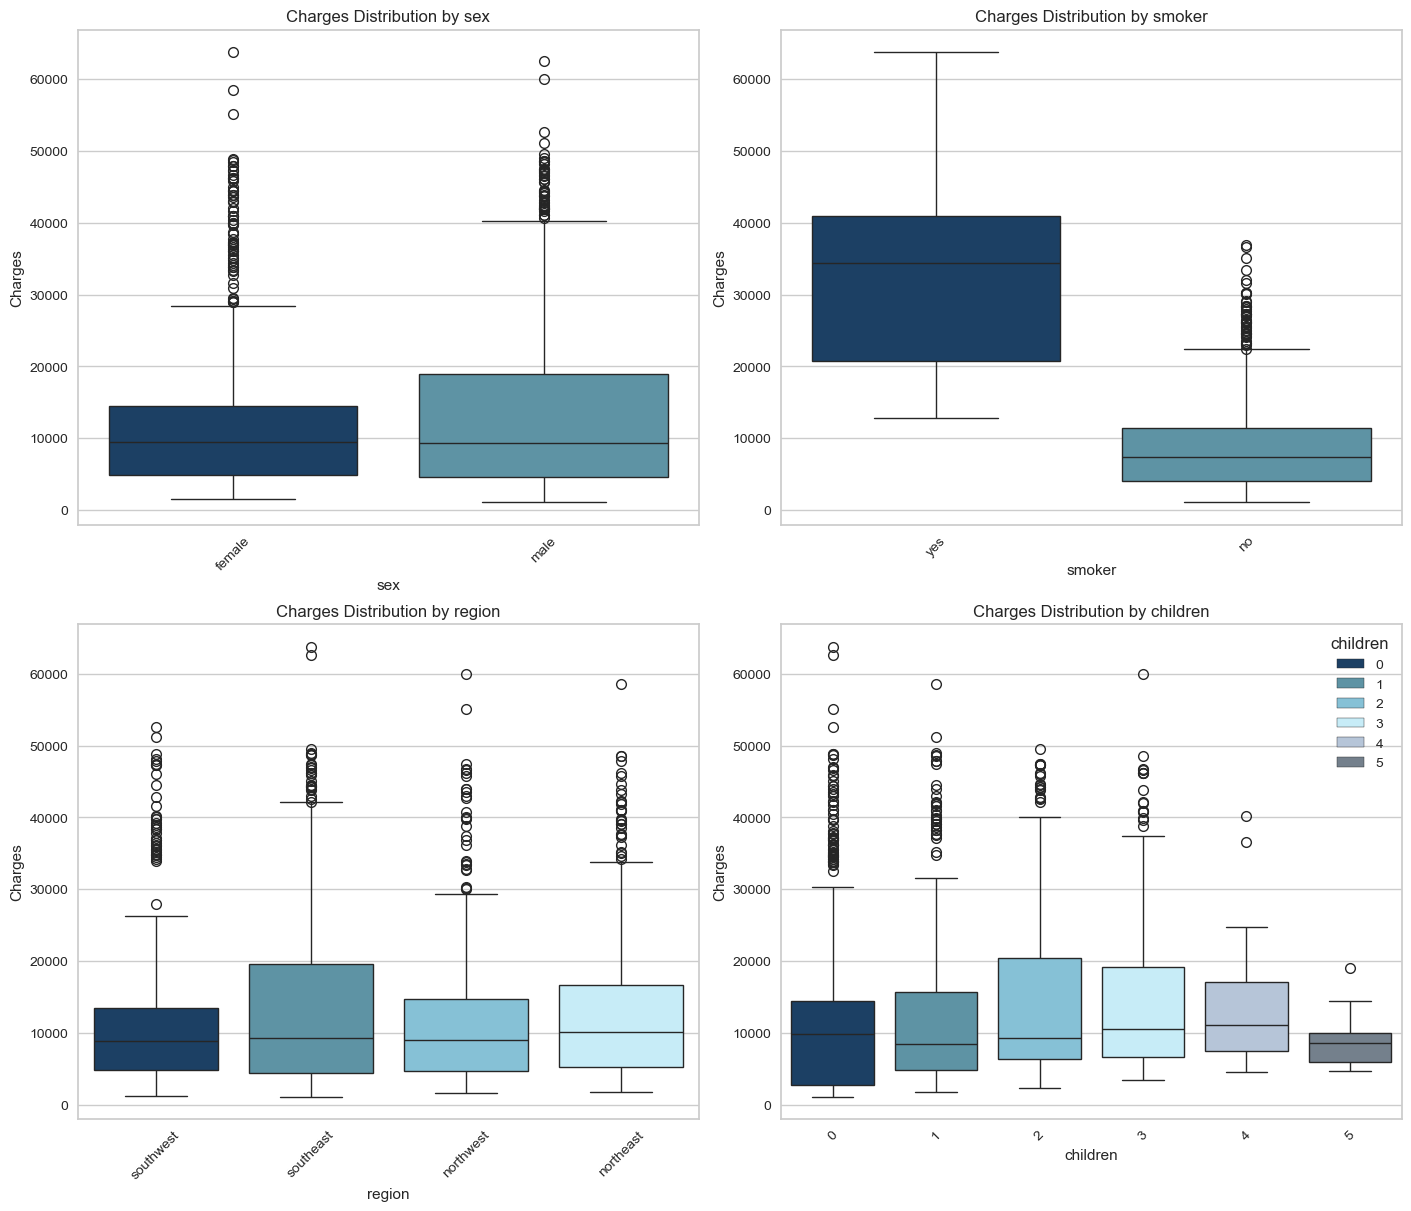

In [54]:
# Visualising the distribution of the charges based on categorical columns
# Subplot
n_cols = 2
n_rows = math.ceil(len(cat_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 6 * n_rows), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.boxplot(data=df, x=col, y='charges', hue=col, palette=palette, ax=axes[i], dodge=False)
    axes[i].set_title(f'Charges Distribution by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Charges')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(len(cat_cols), len(axes)):
    axes[j].set_visible(False)

plt.show()

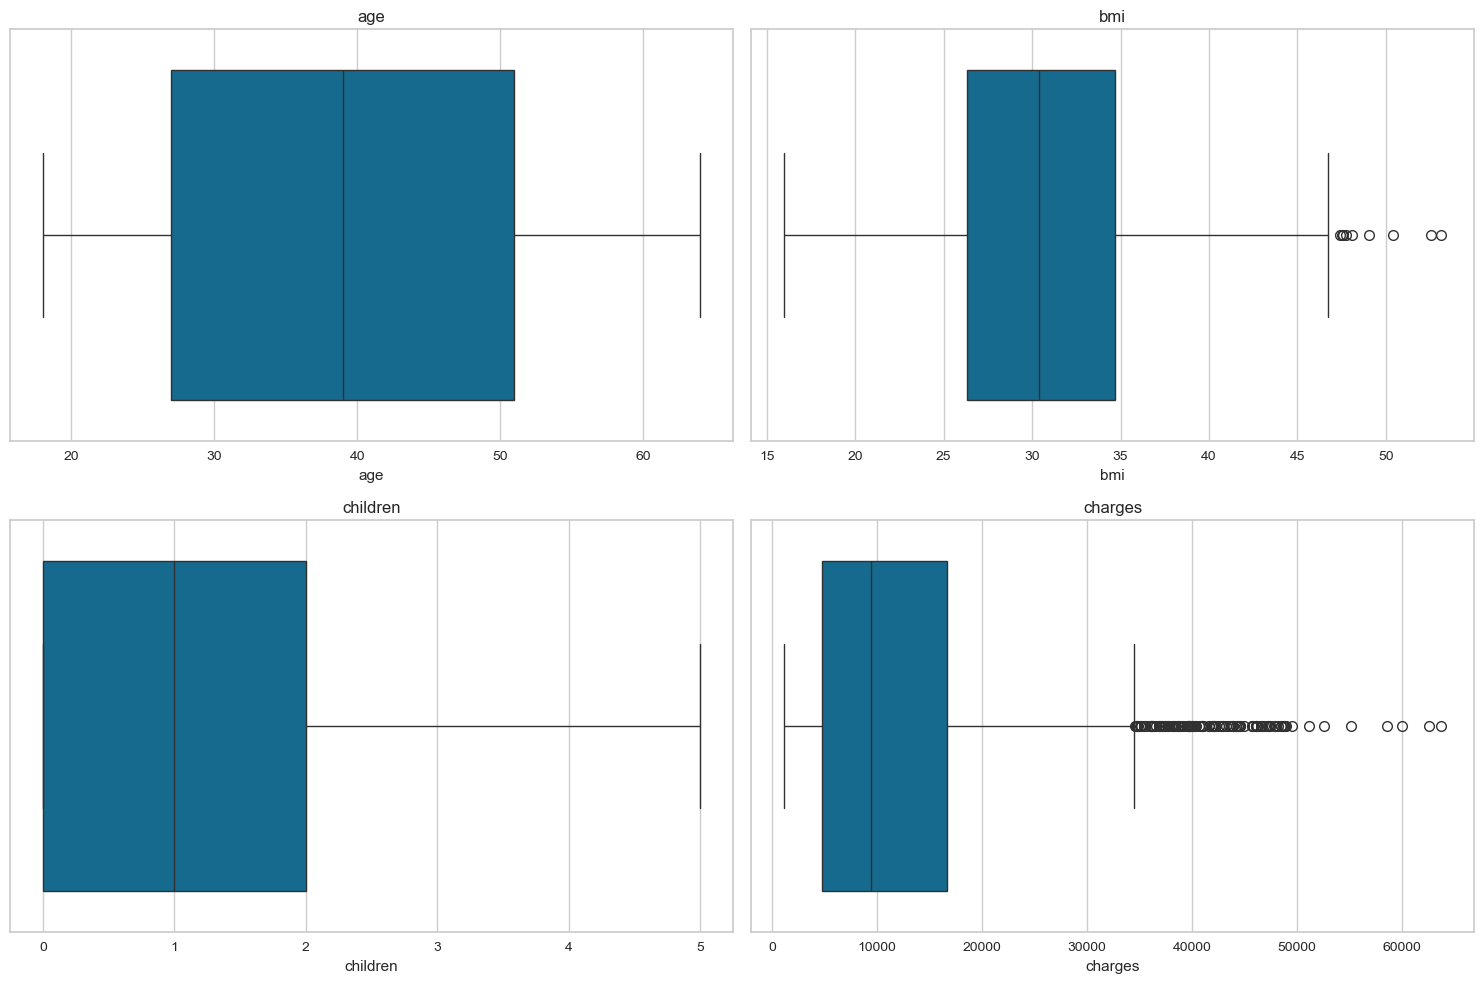

In [55]:
# Visualising the distribution of the numerical columns
num_cols = df.select_dtypes(include=['number']).columns.tolist()

# Subplot
n_cols = 2
n_rows = -(-len(num_cols) // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(num_cols):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel(column)
for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Pairplot of the dataset


<Figure size 800x550 with 0 Axes>

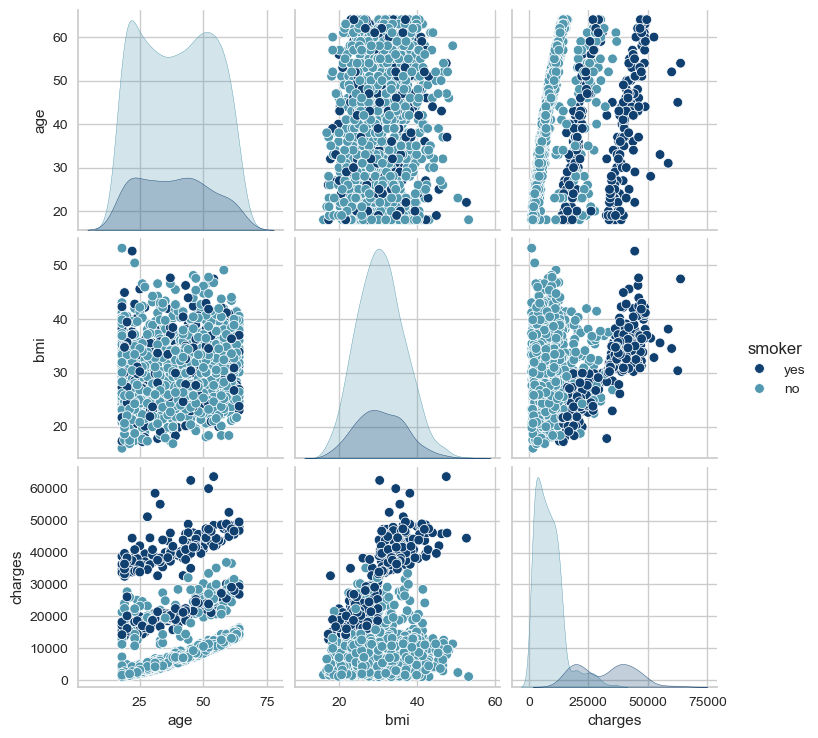

In [56]:
# Creating a pairplot of the numercal features based on smoking status
pairplot_df = df[['age', 'bmi', 'charges','smoker']]

print("Pairplot of the dataset")
plt.figure()
sns.pairplot(pairplot_df, hue='smoker', palette=palette)
plt.show()

---

### Data Preprocessing

#### Null values

In [57]:
#Checking for null/missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

Total  Percent
age           0      0.0
sex           0      0.0
bmi           0      0.0
children      0      0.0
smoker        0      0.0

No null values identified in the dataset

#### Duplicates

In [58]:
# Find and display duplicate rows
duplicates = df[df.duplicated()]
duplicates

age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631

In [59]:
# Removing duplicates
df = df.drop_duplicates()
duplicates = df[df.duplicated()]
duplicates

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []

Duplicate rows removed

#### Outliers

The outliers won't be removed/replaced since they're all realistic and possible values. The aim is to create a model that performs well while these outliers are included.

---

#### Encoding

In [60]:
#Get list of categorical variables
cat_cols = (df.dtypes == 'object')
object_cols = list(cat_cols[cat_cols].index)
print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['sex', 'smoker', 'region']


In [61]:
cat_vars = ['sex', 'smoker', 'region']

# Value counts for each categorical variable
for col in cat_vars:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for sex:
sex
male      675
female    662
Name: count, dtype: int64


Value counts for smoker:
smoker
no     1063
yes     274
Name: count, dtype: int64


Value counts for region:
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64




In [62]:
# Onehot encoding the categorical columns
categorical_columns = ['sex', 'smoker', 'region']

onehot_encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
df_encoded = pd.DataFrame(onehot_encoder.fit_transform(df[categorical_columns]))
df_encoded.columns = onehot_encoder.get_feature_names_out(categorical_columns)
df = df.drop(categorical_columns, axis=1)

df = pd.concat([df.reset_index(drop=True), df_encoded], axis=1)
df.head()


age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400       0.0         1.0               0.0   
1   18  33.770         1   1725.55230       1.0         0.0               0.0   
2   28  33.000         3   4449.46200       1.0         0.0               0.0   
3   33  22.705         0  21984.47061       1.0         0.0               1.0   
4   32  28.880         0   3866.85520       1.0         0.0               1.0   

   region_southeast  region_southwest  
0               0.0               1.0  
1               1.0               0.0  
2               1.0               0.0  
3               0.0               0.0  
4               0.0               0.0

---

### Feature Selection

<Axes: >

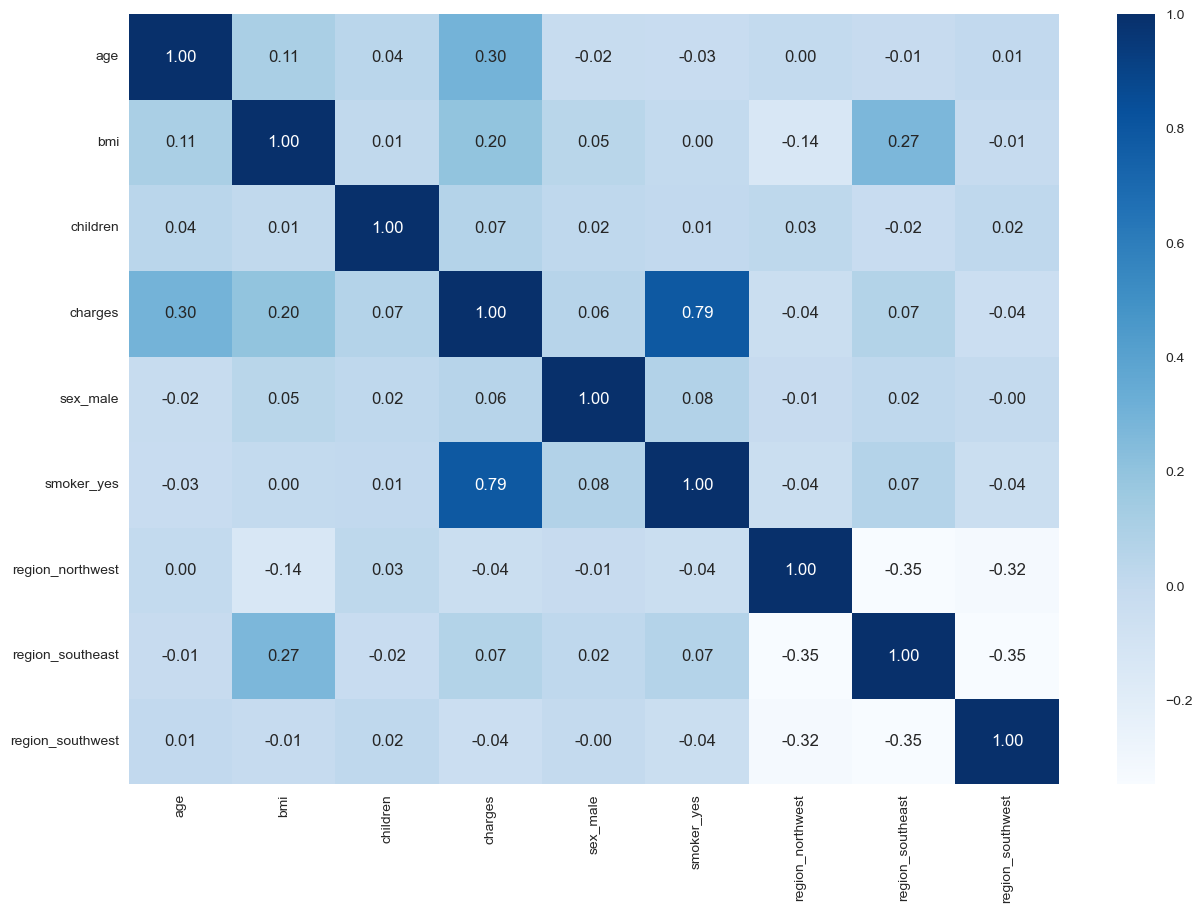

In [63]:
# Correlation heatmap
plt.figure(len(df),figsize=(15,10))
correlation = df.corr()
sns.heatmap(correlation,cmap='Blues',annot=True, fmt='.2f')

##### Smoking shows a strong positive correlation with medical charges. No multicollinearity among features observed.

---

### Machine Learning - Regression

In [64]:
# Defining features and target variable
features = df.drop(columns=['charges'])
target_variable = df['charges']

# Splitting the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(features, target_variable, test_size=0.2, random_state=42)

In [65]:
# Scaling (Standardizing) the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
# List of regression models to train and evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=16),
    'Lasso Regression': Lasso(random_state=16),
    'Decision Tree': DecisionTreeRegressor(random_state=16),
    'Random Forest': RandomForestRegressor(random_state=16),
    'Gradient Boosting': GradientBoostingRegressor(random_state=16),
    'XGBoost': XGBRegressor(random_state=16, eval_metric='rmse'),
    'LightGBM': LGBMRegressor(random_state=16, verbose=-1),
    'AdaBoost': AdaBoostRegressor(random_state=16),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

In [67]:
# Storing the performance of the models
best_model = None
best_params = None
best_r2_score = float('-inf')
best_mae = float('inf')
best_rmse = float('inf')
results = {}

# Loop to train each model and evaluate the performance
for model_name, model in models.items():
    print(f"\n{'='*10} Training {model_name} {'='*10}")
    
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)
    r2 = r2_score(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)

    r2_rounded = round(r2, 2)

    print(f"R² Score: {r2_rounded:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")

    results[model_name] = {
        "model": model,
        "r2_score": r2_rounded,
        "mse": mse,
        "mae": mae,
        "rmse": rmse,
        "Y_pred": Y_pred
    }

    # Updating the best model: 1. If R² is greater. 2. If R² is the same, choosing the model with the lower MAE
    if (r2_rounded > best_r2_score) or (r2_rounded == best_r2_score and mae < best_mae):
        best_model = model
        best_params = {}
        best_r2_score = r2_rounded
        best_mae = mae
        best_rmse = rmse

# Performance summary of the best model
print(f"\n{'='*10} Best Model {'='*10}")
print(f"Model: {best_model}")
print(f"R² Score: {best_r2_score:.2f}")
print(f"Mean Absolute Error: {best_mae:.2f}")
print(f"Root Mean Squared Error: {best_rmse:.2f}")


========== Training Linear Regression ==========
R² Score: 0.81
Mean Squared Error: 35478020.68
Mean Absolute Error: 4177.05
Root Mean Squared Error: 5956.34

========== Training Ridge Regression ==========
R² Score: 0.81
Mean Squared Error: 35512474.83
Mean Absolute Error: 4179.62
Root Mean Squared Error: 5959.23

========== Training Lasso Regression ==========
R² Score: 0.81
Mean Squared Error: 35485364.95
Mean Absolute Error: 4177.21
Root Mean Squared Error: 5956.96

========== Training Decision Tree ==========
R² Score: 0.79
Mean Squared Error: 39227081.03
Mean Absolute Error: 2935.24
Root Mean Squared Error: 6263.15

========== Training Random Forest ==========
R² Score: 0.88
Mean Squared Error: 22563322.87
Mean Absolute Error: 2688.75
Root Mean Squared Error: 4750.09

========== Training Gradient Boosting ==========
R² Score: 0.90
Mean Squared Error: 18116694.10
Mean Absolute Error: 2493.58
Root Mean Squared Error: 4256.37

========== Training XGBoost ==========
R² Score: 0.87
M

### Hyperparameter Tuning

In [68]:
# Defining the models and the hyperparameter grids for each model
models = {
    'Linear Regression': (LinearRegression(), {

    }),
    'Ridge Regression': (Ridge(random_state=16), {
        'alpha': [0.1, 1, 10, 100],
        'solver': ['auto', 'svd', 'cholesky', 'saga', 'lsqr']
    }),
    'Lasso Regression': (Lasso(random_state=16), {
        'alpha': [0.01, 0.1, 1, 10],
        'max_iter': [1000, 2000, 5000]
    }),
    'Decision Tree': (DecisionTreeRegressor(random_state=16), {
        'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    'Random Forest': (RandomForestRegressor(random_state=16), {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }),
    'Gradient Boosting': (GradientBoostingRegressor(random_state=16), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.5, 0.7, 1.0]
    }),
    'XGBoost': (XGBRegressor(random_state=16, eval_metric='rmse'), {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.5, 0.7, 0.9, 1.0],
        'colsample_bytree': [0.5, 0.7, 0.9, 1.0]
    }),
    'LightGBM': (LGBMRegressor(random_state=16, verbose=-1), {
        'n_estimators': [100, 200, 300],
        'max_depth': [-1, 10, 20, 30],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [31, 50, 100]
    }),
    'AdaBoost': (AdaBoostRegressor(random_state=16), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0],
        'loss': ['linear', 'square', 'exponential']
    }),
    'K-Nearest Neighbors': (KNeighborsRegressor(), {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    })
}

In [69]:
# Storing the results of the models
best_model = None
best_params = None
best_r2_score = float('-inf')
best_mae = float('inf')
best_rmse = float('inf')
results = {}

# Hyperparameter tuning each model
for model_name, (model, param_grid) in models.items():
    print(f"\n{'='*10} Tuning {model_name} {'='*10}")
    
    # Grid Search with 5-Fold Cross-Validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, Y_train)

    # Obtaining the best estimator and parameters
    best_estimator = grid_search.best_estimator_
    current_best_params = grid_search.best_params_
    Y_pred = best_estimator.predict(X_test)

    # Evaluation metrics
    r2 = r2_score(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)

    r2_rounded = round(r2, 2)

    print(f"R² Score: {r2_rounded:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"Best Parameters: {current_best_params}")

    results[model_name] = {
        "model": best_estimator,
        "r2_score": r2_rounded,
        "mse": mse,
        "mae": mae,
        "rmse": rmse,
        "best_params": current_best_params,
        "Y_pred": Y_pred
    }

    # Updating the best model: 1. If R² is greater. 2. If R² is the same, choose the model with the lower MAE.
    if (r2_rounded > best_r2_score) or (r2_rounded == best_r2_score and mae < best_mae):
        best_model = best_estimator
        best_params = current_best_params
        best_r2_score = r2_rounded
        best_mae = mae
        best_rmse = rmse

# Performance summary of the best model
print(f"\n{'='*10} Best Model {'='*10}")
print(f"Model: {best_model}")
print(f"Parameters: {best_params}")
print(f"R² Score: {best_r2_score:.2f}")
print(f"Mean Absolute Error: {best_mae:.2f}")
print(f"Root Mean Squared Error: {best_rmse:.2f}")


========== Tuning Linear Regression ==========
R² Score: 0.81
Mean Squared Error: 35478020.68
Mean Absolute Error: 4177.05
Root Mean Squared Error: 5956.34
Best Parameters: {}

========== Tuning Ridge Regression ==========
R² Score: 0.81
Mean Squared Error: 35829011.84
Mean Absolute Error: 4202.53
Root Mean Squared Error: 5985.73
Best Parameters: {'alpha': 10, 'solver': 'saga'}

========== Tuning Lasso Regression ==========
R² Score: 0.81
Mean Squared Error: 35552990.01
Mean Absolute Error: 4178.73
Root Mean Squared Error: 5962.63
Best Parameters: {'alpha': 10, 'max_iter': 1000}

========== Tuning Decision Tree ==========
R² Score: 0.88
Mean Squared Error: 21217632.33
Mean Absolute Error: 1920.20
Root Mean Squared Error: 4606.26
Best Parameters: {'criterion': 'absolute_error', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}

========== Tuning Random Forest ==========
R² Score: 0.90
Mean Squared Error: 18883089.84
Mean Absolute Error: 2470.06
Root Mean Squared Error:

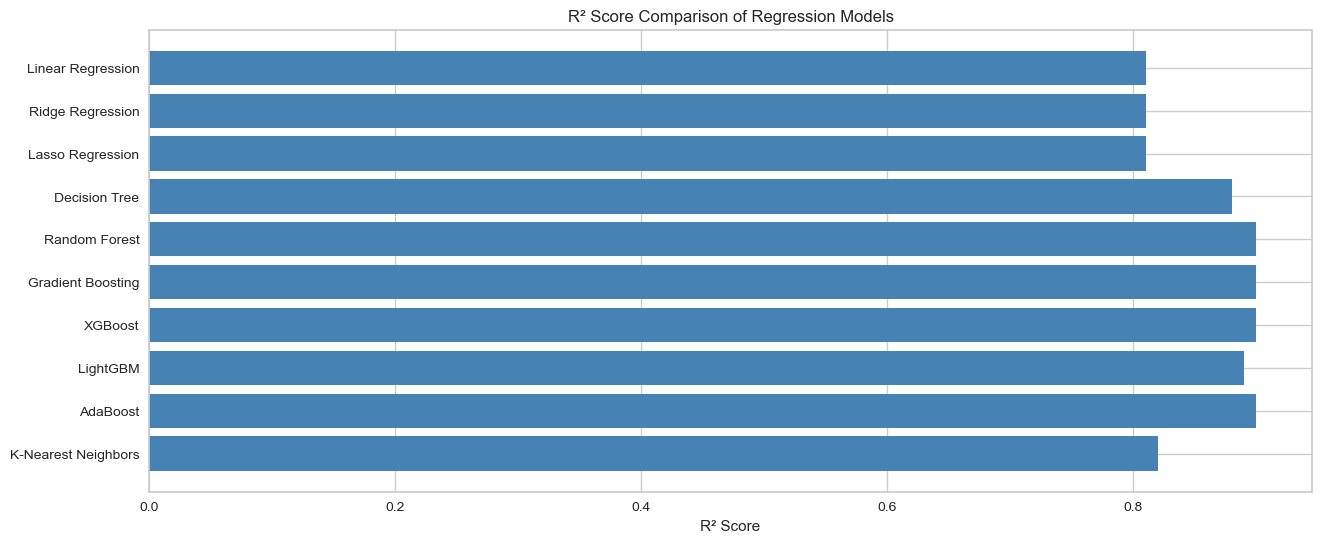

In [70]:
# Bar chart displaying R² values of each model
plt.figure(figsize=(15, 6))
plt.barh(list(results.keys()), [res["r2_score"] for res in results.values()], color='steelblue')
plt.xlabel("R² Score")
plt.title("R² Score Comparison of Regression Models")
plt.gca().invert_yaxis()
plt.show()

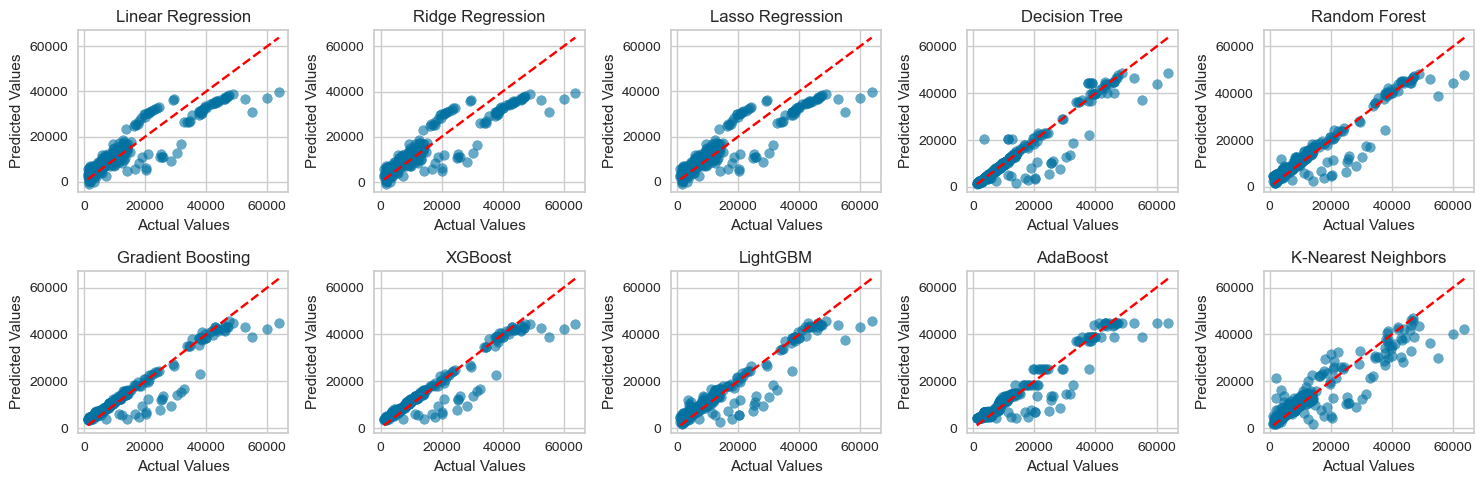

In [71]:
# Subplots for Actual vs Predicted values of each model
fig, axes = plt.subplots(2, 5, figsize=(15, 5))
axes = axes.flatten()

for idx, (model_name, res) in enumerate(results.items()):
    axes[idx].scatter(Y_test, res["Y_pred"], alpha=0.6)
    axes[idx].plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
    axes[idx].set_title(model_name)
    axes[idx].set_xlabel('Actual Values')
    axes[idx].set_ylabel('Predicted Values')

plt.tight_layout()
plt.show()


Regression Metrics:
Mean Absolute Error (MAE): 2470.06
Mean Squared Error (MSE): 18883089.84
Root Mean Squared Error (RMSE): 4345.47
R² Score: 0.90


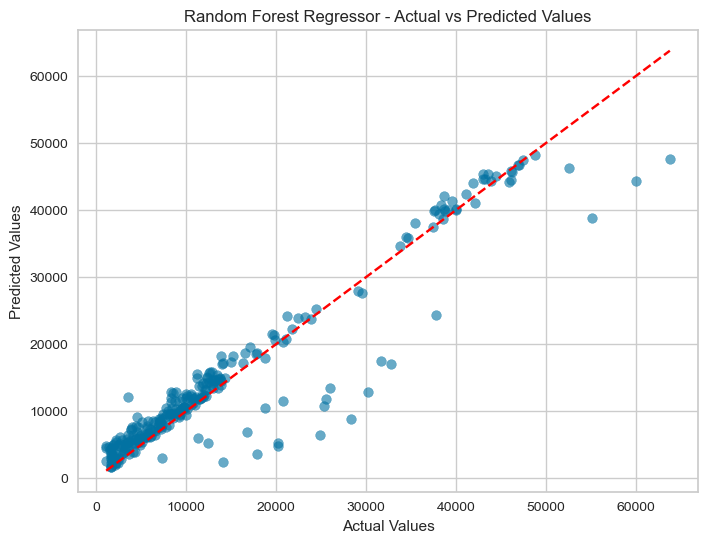

In [72]:
# Regression metrics for the best model
Y_pred = best_model.predict(X_test)
print("\nRegression Metrics:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(Y_test, Y_pred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(Y_test, Y_pred):.2f}")
print(f"Root Mean Squared Error (RMSE): {mean_squared_error(Y_test, Y_pred) ** 0.5:.2f}")
print(f"R² Score: {r2_score(Y_test, Y_pred):.2f}")

# Plotting the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, alpha=0.6)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regressor - Actual vs Predicted Values')
plt.show()

---

## **Classification**

---

In [73]:
# Importing libraries for data wrangling and visualisation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# Suppress warnings
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)  

### Dataset Link
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data

In [74]:
# Importing the dataset
df = pd.read_csv('C:\\Users\\20246\\Desktop\\ML Coursework\\heart.csv')
df.T

0       1    2       3       4       5       6       7    \
Age                 40      49   37      48      54      39      45      54   
Sex                  M       F    M       F       M       M       F       M   
ChestPainType      ATA     NAP  ATA     ASY     NAP     NAP     ATA     ATA   
RestingBP          140     160  130     138     150     120     130     110   
Cholesterol        289     180  283     214     195     339     237     208   
FastingBS            0       0    0       0       0       0       0       0   
RestingECG      Normal  Normal   ST  Normal  Normal  Normal  Normal  Normal   
MaxHR              172     156   98     108     122     170     170     142   
ExerciseAngina       N       N    N       Y       N       N       N       N   
Oldpeak            0.0     1.0  0.0     1.5     0.0     0.0     0.0     0.0   
ST_Slope            Up    Flat   Up    Flat      Up      Up      Up      Up   
HeartDisease         0       1    0       1       0       0       0       0   

                   8       9    ...  908     909     910   911     912  \
Age                 37      48  ...   63      63      41    59      57   
Sex                  M       F  ...    M       F       M     M       F   
ChestPainType      ASY     ATA  ...  ASY     ASY     ATA   ASY     ASY   
RestingBP          140     120  ...  140     124     120   164     140   
Cholesterol        207     284  ...  187     197     157   176     241   
FastingBS            0       0  ...    0       0       0     1       0   
RestingECG      Normal  Normal  ...  LVH  Normal  Normal   LVH  Normal   
MaxHR              130     120  ...  144     136     182    90     123   
ExerciseAngina       Y       N  ...    Y       Y       N     N       Y   
Oldpeak            1.5     0.0  ...  4.0     0.0     0.0   1.0     0.2   
ST_Slope          Flat      Up  ...   Up    Flat      Up  Flat    Flat   
HeartDisease         1       0  ...    1       1       0     1       1   

                   913     914     915   916     917  
Age                 45      68      57    57      38  
Sex                  M       M       M     F       M  
ChestPainType       TA     ASY     ASY   ATA     NAP  
RestingBP          110     144     130   130     138  
Cholesterol        264     193     131   236     175  
FastingBS            0       1       0     0       0  
RestingECG      Normal  Normal  Normal   LVH  Normal  
MaxHR              132     141     115   174     173  
ExerciseAngina       N       N       Y     N       N  
Oldpeak            1.2     3.4     1.2   0.0     0.0  
ST_Slope          Flat    Flat    Flat  Flat      Up  
HeartDisease         1       1       1     1       0  

[12 rows x 918 columns]

# Exploratory Data Analysis

In [75]:
# Checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [76]:
# Checking the dataset statistics
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

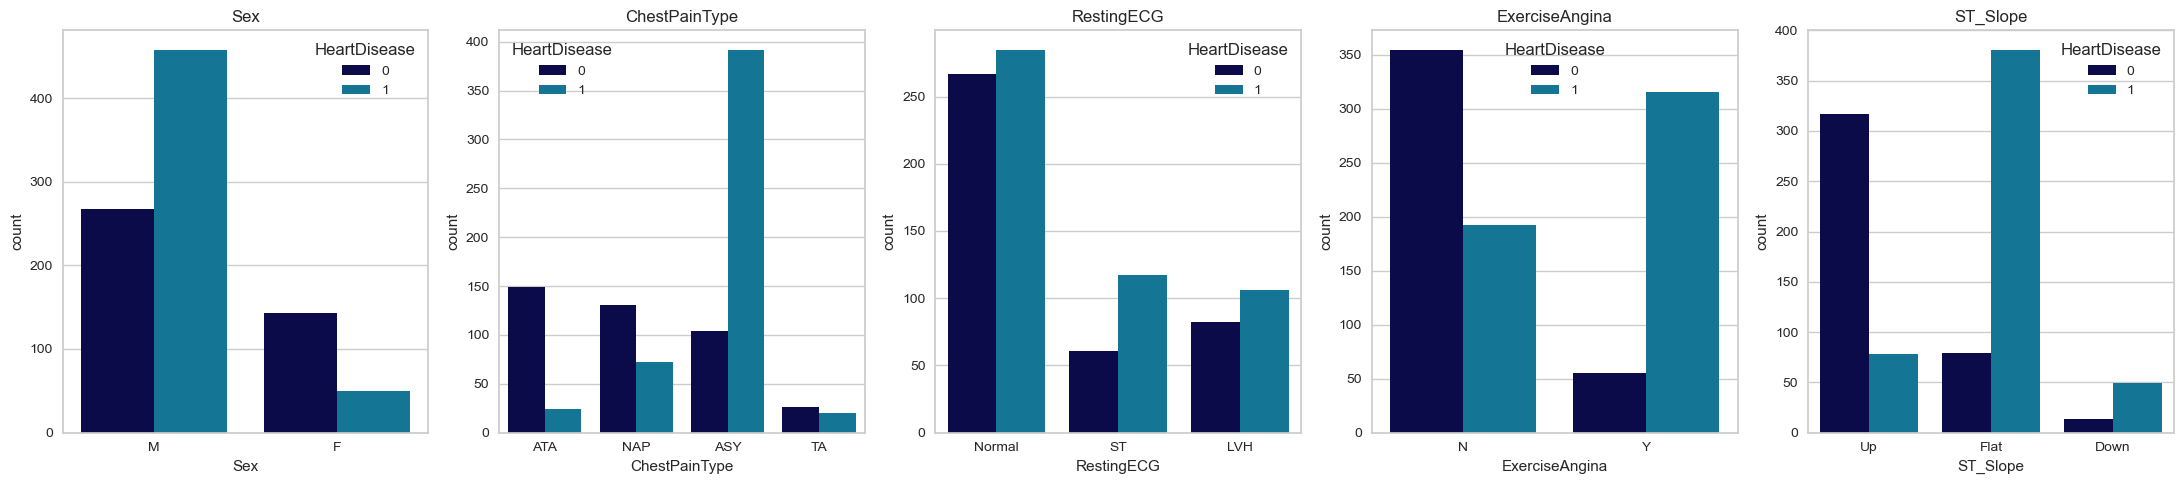

In [77]:
# Visualising the distribution of the categorical columns

cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
n_cols = 5
n_rows = (len(cat_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(22, 5 * n_rows))
axes = axes.flatten()

for ax, col in zip(axes, cat_cols):
    sns.countplot(x=col, data=df, hue='HeartDisease', ax=ax, palette='ocean')
    ax.set_title(f'{col}')

for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

In [78]:
# Obtaining the list of numerical columns
num_cols = df.select_dtypes(include=['number']).columns.tolist()
num_cols

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

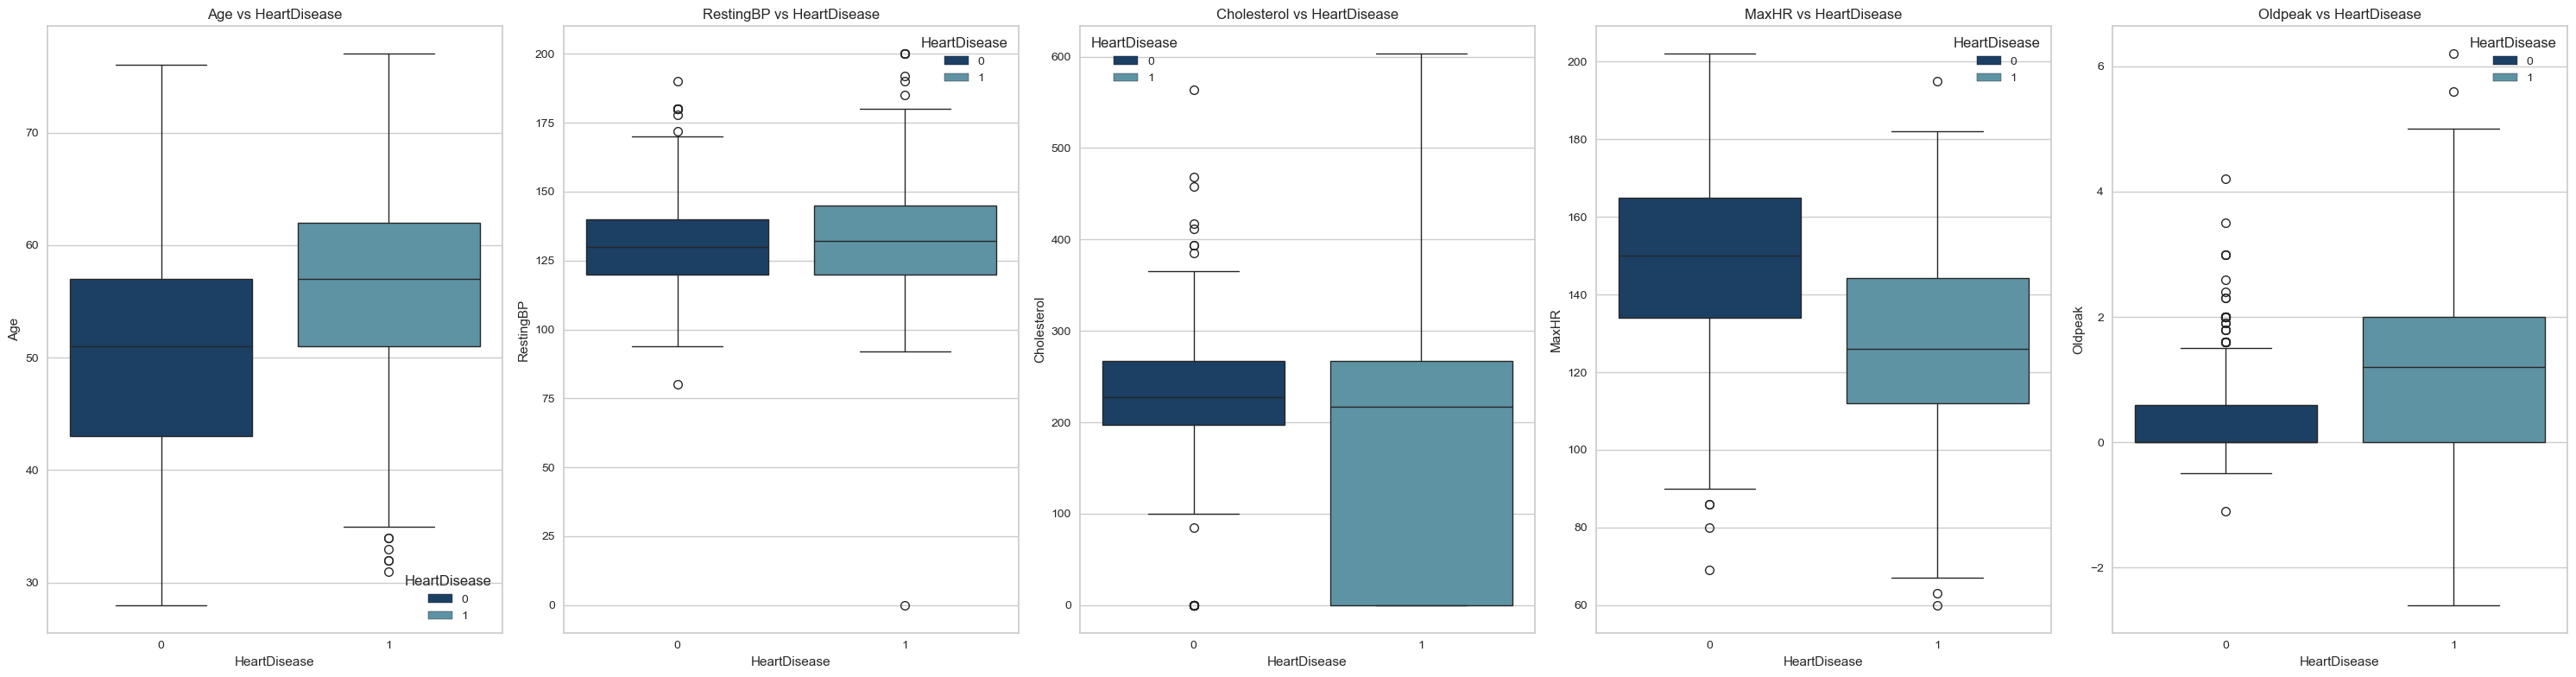

In [79]:
# Visualising the distribution of the numerical features
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
n_cols = 5
n_rows = -(-len(num_cols) // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 8 * n_rows))
axes = axes.flatten()

for i, column in enumerate(num_cols):
    sns.boxplot(x='HeartDisease', y=column, data=df, ax=axes[i], hue=df['HeartDisease'], palette = ['#104070','#5299B0'])
    axes[i].set_title(f'{column} vs HeartDisease')
    axes[i].set_xlabel('HeartDisease')
    axes[i].set_ylabel(column)

for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Pairplot of the dataset


<Figure size 800x550 with 0 Axes>

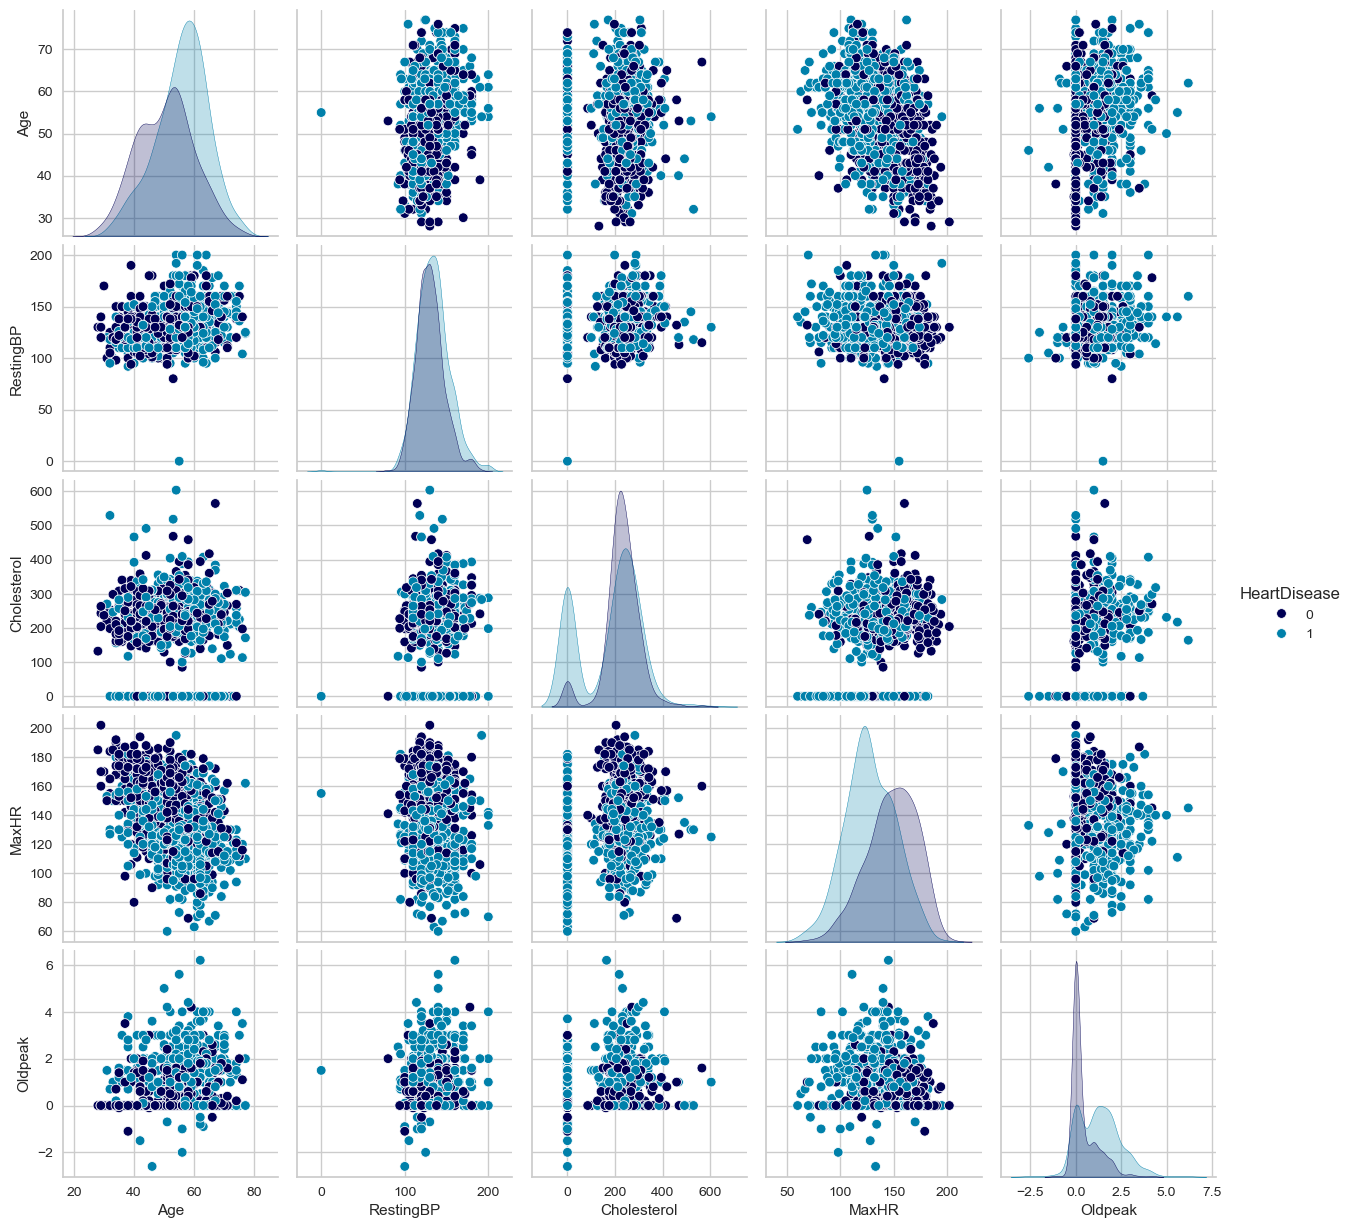

In [80]:
# Pairplot to visualise the relationship between features based on Heart Disease status
df_subset = df.drop(columns=['FastingBS'])
print("Pairplot of the dataset")
plt.figure()
sns.pairplot(df_subset, hue='HeartDisease', palette= 'ocean')
plt.show()

In [81]:
# Checking for value counts of the target variable
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

---

# Data Pre-Processing

### Missing entries

In [82]:
#Checking for null/missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

Total  Percent
Age                0      0.0
Sex                0      0.0
ChestPainType      0      0.0
RestingBP          0      0.0
Cholesterol        0      0.0

##### No missing values observed

#### Duplicates

In [83]:
# Display duplicate rows
duplicates = df[df.duplicated()]
duplicates

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []

No duplicates rows observed

### Outliers

In [84]:
# LOcating the entry with Resting Blood Pressure 0
restingbp_zero = df[df['RestingBP'] == 0]
restingbp_zero

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
449   55   M           NAP          0            0          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
449    155              N      1.5     Flat             1

In [85]:
# Dropping the entry with RestingBP equal to 0
df = df[df['RestingBP'] != 0]

In [86]:
# Checking for value counts of the target variable
df['Cholesterol'].value_counts()

Cholesterol
0      171
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: count, Length: 222, dtype: int64

In [87]:
# Dropping the 'Cholesterol' column since it has a large number of 0 values that are unrealistic in individuals
df = df.drop('Cholesterol', axis=1)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 917 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             917 non-null    int64  
 1   Sex             917 non-null    object 
 2   ChestPainType   917 non-null    object 
 3   RestingBP       917 non-null    int64  
 4   FastingBS       917 non-null    int64  
 5   RestingECG      917 non-null    object 
 6   MaxHR           917 non-null    int64  
 7   ExerciseAngina  917 non-null    object 
 8   Oldpeak         917 non-null    float64
 9   ST_Slope        917 non-null    object 
 10  HeartDisease    917 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 86.0+ KB


##### Unrealistic values are rectified

---

### Encoding

In [89]:
# Obtaining the list of categorical variables
cat_cols = (df.dtypes == 'object')
object_cols = list(cat_cols[cat_cols].index)
print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [90]:
cat_vars = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Value counts for each categorical variable
for col in cat_vars:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for Sex:
Sex
M    724
F    193
Name: count, dtype: int64


Value counts for ChestPainType:
ChestPainType
ASY    496
NAP    202
ATA    173
TA      46
Name: count, dtype: int64


Value counts for RestingECG:
RestingECG
Normal    551
LVH       188
ST        178
Name: count, dtype: int64


Value counts for ExerciseAngina:
ExerciseAngina
N    546
Y    371
Name: count, dtype: int64


Value counts for ST_Slope:
ST_Slope
Flat    459
Up      395
Down     63
Name: count, dtype: int64




In [91]:
# Mapping categorical variables to numerical values based on rank

#ChestPainType
chest_pain_mapping = {'TA': 0, 'ATA': 1, 'NAP': 2, 'ASY': 3}
df.loc[:, 'ChestPainType'] = df['ChestPainType'].map(chest_pain_mapping)

#ST_Slope
st_slope_mapping = {'Up': 0, 'Flat': 1, 'Down': 2}
df.loc[:, 'ST_Slope'] = df['ST_Slope'].map(st_slope_mapping)

In [92]:
# One-hot encoding the categorical columns (nominal)
categorical_columns = ['Sex', 'RestingECG', 'ExerciseAngina']

onehot_encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
df_encoded = pd.DataFrame(onehot_encoder.fit_transform(df[categorical_columns]))
df_encoded.columns = onehot_encoder.get_feature_names_out(categorical_columns)
df = df.drop(categorical_columns, axis=1)
df = pd.concat([df.reset_index(drop=True), df_encoded], axis=1)
df.head()


Age ChestPainType  RestingBP  FastingBS  MaxHR  Oldpeak ST_Slope  \
0   40             1        140          0    172      0.0        0   
1   49             2        160          0    156      1.0        1   
2   37             1        130          0     98      0.0        0   
3   48             3        138          0    108      1.5        1   
4   54             2        150          0    122      0.0        0   

   HeartDisease  Sex_M  RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  
0             0    1.0                1.0            0.0               0.0  
1             1    0.0                1.0            0.0               0.0  
2             0    1.0                0.0            1.0               0.0  
3             1    0.0                1.0            0.0               1.0  
4             0    1.0                1.0            0.0               0.0

---

<Axes: >

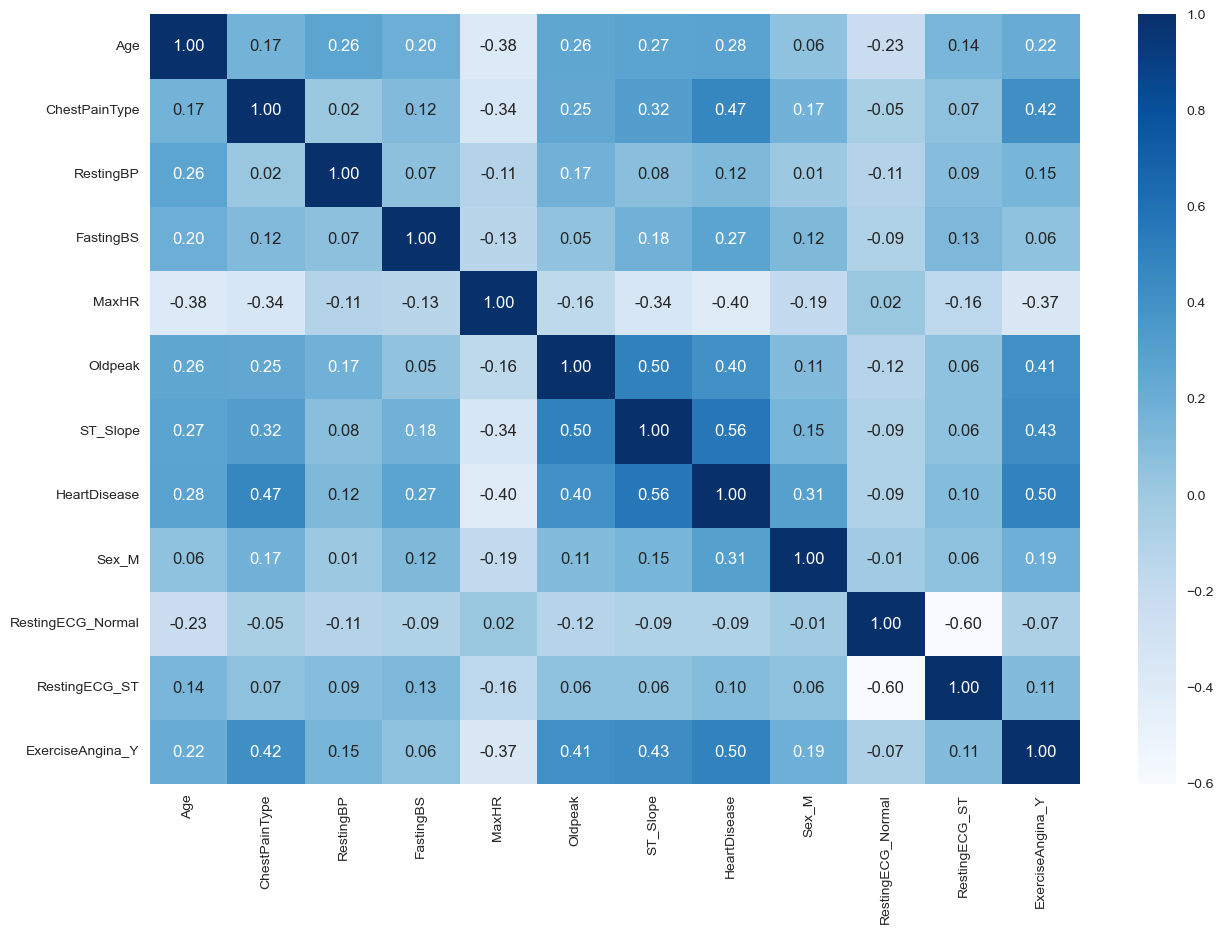

In [93]:
# Correlation heatmap
plt.figure(len(df),figsize=(15,10))
correlation = df.corr()
sns.heatmap(correlation,cmap='Blues',annot=True, fmt='.2f')

### Machine Learning - Classification

In [94]:
# Defining features and target variable
features = df.drop(columns=['HeartDisease'])
target_variable = df['HeartDisease']

# Splitting the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(features, target_variable, test_size=0.2, random_state=42)

In [95]:
# Scaling (Standardizing) the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [96]:
# List of classification models to be trained and evaluated
models = {
    'Logistic Regression': LogisticRegression(random_state=16),
    'Decision Tree': DecisionTreeClassifier(random_state=16),
    'Random Forest': RandomForestClassifier(random_state=16),
    'XGBoost': XGBClassifier(random_state=16, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=16, verbose=-1),
    'CatBoost': CatBoostClassifier(random_state=16, verbose=0),
    'AdaBoost': AdaBoostClassifier(random_state=16, algorithm='SAMME'),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [97]:
# Storing the best models
best_model = None
best_params = None
best_accuracy = 0
model_performance = {}

# Training each model and obtaining evaluation metrics
for model_name, model in models.items():
    print(f"\n{'='*10} Training {model_name} {'='*10}")
    
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)
    Y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Accuracy
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Classification report
    report = classification_report(Y_test, Y_pred)
    print("Classification Report:\n", report)

    # Confusion matrix
    cm = confusion_matrix(Y_test, Y_pred)
    print("Confusion Matrix:\n", cm)

    # ROC-AUC score
    roc_auc = roc_auc_score(Y_test, Y_pred_proba) if Y_pred_proba is not None else None
    print(f"ROC-AUC Score: {roc_auc:.2f}" if roc_auc else "ROC-AUC Score: Not Available")

    # Store model performance to compare
    model_performance[model_name] = {
        "model": model,
        "accuracy": accuracy,
        "roc_auc": roc_auc
    }

    # Updating the best model when the accuracy is higher
    if accuracy > best_accuracy:
        best_model = model
        best_params = {}
        best_accuracy = accuracy

# Display the resuls of the best model
print(f"\n{'='*10} Best Model {'='*10}")
print(f"Model: {best_model}")
print(f"Accuracy: {best_accuracy:.2f}")


========== Training Logistic Regression ==========
Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.83      0.79        72
           1       0.89      0.83      0.86       112

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.83       184
weighted avg       0.84      0.83      0.83       184

Confusion Matrix:
 [[60 12]
 [19 93]]
ROC-AUC Score: 0.90

========== Training Decision Tree ==========
Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.82      0.76        72
           1       0.87      0.78      0.82       112

    accuracy                           0.79       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.80      0.79      0.80       184

Confusion Matrix:
 [[59 13]
 [25 87]]
ROC-AUC Score: 0.80

========== Training Random Forest ==========
Accuracy

### Hyperparameter Tuning

In [98]:
# Define the models and the hyperparameter grids for each model
models = {
    'Logistic Regression': (LogisticRegression(random_state=16), {
        'class_weight': ['balanced', None],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'C': [0.1, 1, 10, 100],
        'max_iter': [100, 200, 500, 1000]
    }),
    'Decision Tree': (DecisionTreeClassifier(random_state=16), {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    'Random Forest': (RandomForestClassifier(random_state=16), {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }),
    'XGBoost': (XGBClassifier(random_state=16, use_label_encoder=False, eval_metric='logloss'), {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.5, 0.7, 0.9, 1.0],
        'colsample_bytree': [0.5, 0.7, 0.9, 1.0]
    }),
    'LightGBM': (LGBMClassifier(random_state=16, verbose=-1), {
        'n_estimators': [100, 200, 300],
        'max_depth': [-1, 10, 20, 30],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [31, 50, 100]
    }),
    'CatBoost': (CatBoostClassifier(random_state=16, verbose=0), {
        'iterations': [100, 200, 300],
        'depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    }),
    'AdaBoost': (AdaBoostClassifier(random_state=16, algorithm='SAMME'), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    }),
    'K-Nearest Neighbors': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    })
}

In [99]:
# Initializing variables to track the best model
best_model = None
best_params = None
best_accuracy = 0
model_performance = {}

# Hyperparameter tuning each model and obtaining performance metrics
for model_name, (model, param_grid) in models.items():
    print(f"\n{'='*10} Tuning {model_name} {'='*10}")
    
    # Grid Search with 5-Fold Cross-Validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, Y_train)

    # Obtaining the best model and parameters
    best_estimator = grid_search.best_estimator_
    best_hyperparams = grid_search.best_params_ 
    Y_pred = best_estimator.predict(X_test)
    Y_pred_proba = best_estimator.predict_proba(X_test)[:, 1] if hasattr(best_estimator, "predict_proba") else None

    # Accuracy
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Best Parameters: {best_hyperparams}")

    # Classification report
    report = classification_report(Y_test, Y_pred)
    print("Classification Report:\n", report)

    # Confusion matrix
    cm = confusion_matrix(Y_test, Y_pred)
    print("Confusion Matrix:\n", cm)

    # ROC-AUC score
    roc_auc = roc_auc_score(Y_test, Y_pred_proba) if Y_pred_proba is not None else None
    print(f"ROC-AUC Score: {roc_auc:.2f}" if roc_auc else "ROC-AUC Score: Not Available")

    # Store model performance for comparison
    model_performance[model_name] = {
        "best_model": best_estimator,
        "best_params": best_hyperparams, 
        "accuracy": accuracy,
        "roc_auc": roc_auc
    }

    # Updating the best model when the accuracy is higher
    if accuracy > best_accuracy:
        best_model = best_estimator
        best_params = best_hyperparams 
        best_accuracy = accuracy

# Display best model details
print(f"\n{'='*10} Best Model {'='*10}")
print(f"Model: {best_model}")
print(f"Parameters: {best_params}")
print(f"Accuracy: {best_accuracy:.2f}")


========== Tuning Logistic Regression ==========
Accuracy: 0.83
Best Parameters: {'C': 0.1, 'class_weight': None, 'max_iter': 100, 'solver': 'newton-cg'}
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.83      0.79        72
           1       0.89      0.83      0.86       112

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.83       184
weighted avg       0.84      0.83      0.83       184

Confusion Matrix:
 [[60 12]
 [19 93]]
ROC-AUC Score: 0.90

========== Tuning Decision Tree ==========
Accuracy: 0.77
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.81      0.73        72
           1       0.86      0.75      0.80       112

    accuracy                           0.77       184
   macro avg       0.77      


Classification Report: CatBoost Classifier
                   precision    recall  f1-score   support

No Heart Disease       0.83      0.88      0.85        72
   Heart Disease       0.92      0.88      0.90       112

        accuracy                           0.88       184
       macro avg       0.87      0.88      0.88       184
    weighted avg       0.88      0.88      0.88       184



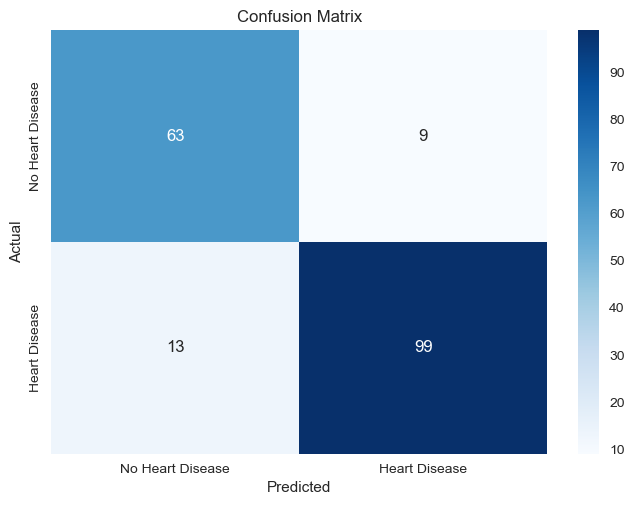

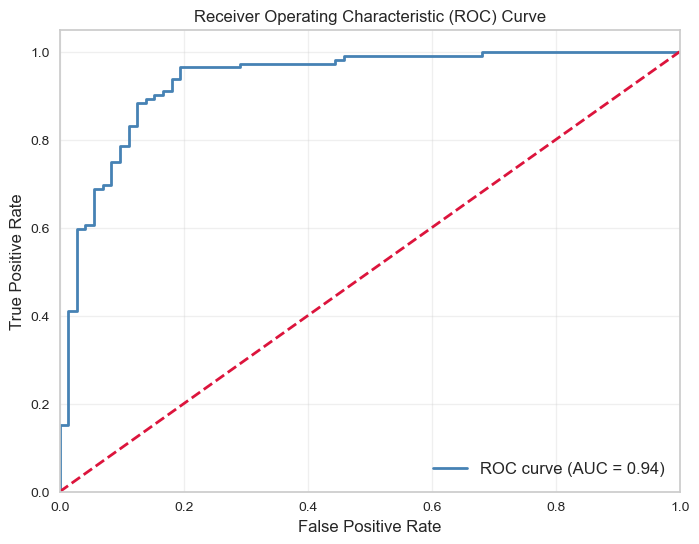

In [100]:
# Classification report and confusion matrix of the best model
Y_pred = best_model.predict(X_test)
print("\nClassification Report: CatBoost Classifier\n", classification_report(Y_test, Y_pred, target_names=['No Heart Disease', 'Heart Disease']))
conf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Heart Disease', 'Heart Disease'], 
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Predicting the probabilities
y_probs = best_model.predict_proba(X_test)[:, 1]

# Plotting the ROC curve and displaying the AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='steelblue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='crimson', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

---